# Telecom Churn Case Study
## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 
For many incumbent operators, retaining high profitable customers is the number one business goal.

 
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 
In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Essentially, we need to-
- Identify High Value Customers
- Tag churners, based on the fourth month of data


## The solution is divided into the following sections:

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### Import the necessary Libararies and Classes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

sns.set_style('whitegrid')
%matplotlib inline

# Set the no of columns to be displayed to 500
pd.set_option('display.max_columns', 500)

# Set the no of rows to be displayed to 200
pd.set_option('display.max_rows', 300)

#set scientific noations 9.8e+11 to 9888777777.1245
pd.options.display.float_format = '{:.4f}'.format


# Import libararies, specific to Machine Learning/Logistic Regression

import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


# Import libariaries for XGBoosting

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

from imblearn.over_sampling import SMOTE

# Import random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier



In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

##  1. Reading and Understanding the Data

In [3]:
####################### Define Global Variables ##################################

# Assign the path of the local dir to a variable. 
#This path must be updated, if the notebook is being executed on a different machine.

# Purba's
#Local_Dir = r"C:\Users\SCHOOL\Desktop\Assigments\Lead Scoring Assignment"

# Chandan's
Local_Dir = r"C:\DS_Learning\Data_Science_IITB\Machine_Learning\Case_Study_2_Telecom_Churn"


# Store the name of the file in a variable. The file contanins the data about the countries and their socio-economic factors.
# The variable must be updated, if a different version of file being used


lfile = r"\telecom_churn_data.csv"
Telecom_Churn_Dataset = str(Local_Dir + lfile)

In [4]:
#Read the lead score dataset and load it into a Dataframe df
df = pd.read_csv(Telecom_Churn_Dataset) 

In [5]:
# Get the basic information about the Dataset
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109          0.0000          0.0000          0.0000   
1     7001865778        109          0.0000          0.0000          0.0000   
2     7001625959        109          0.0000          0.0000          0.0000   
3     7001204172        109          0.0000          0.0000          0.0000   
4     7000142493        109          0.0000          0.0000          0.0000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014 197.3850 214.8160 213.8030  21.1000          nan   
1            9/30/2014  34.0470 355.0740 268.3210  86.2850      24.1100   
2            9/30/2014 167.6900 189.0580 210.2260 290.7140      11.5400   
3            9/30/2014 221.3380 251.1020 508.0540 389.5000      99.9100   
4            9/30/2014 261.6360 309.8760 238.1740 163.4260      50.3100   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan       0.0000          nan           nan           nan   
1      78.6800       7.6800      18.3400       15.7400       99.8400   
2      55.2400      37.2600      74.8100      143.3300      220.5900   
3      54.3900     310.9800     241.7100      123.3100      109.0100   
4     149.4400      83.8900      58.7800       76.9600       91.8800   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        0.0000           nan            nan            nan         0.0000   
1      304.7600       53.7600         0.0000         0.0000         0.0000   
2      208.3600      118.9100         0.0000         0.0000         0.0000   
3       71.6800      113.5400         0.0000        54.8600        44.3800   
4      124.2600       45.8100         0.0000         0.0000         0.0000   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan         0.0000            nan   
1         0.0000         0.0000         0.0000         0.0000         0.0000   
2        38.4900         0.0000         0.0000         0.0000        70.9400   
3         0.0000         0.0000        28.0900        39.0400         0.0000   
4         0.0000         0.0000         0.0000         0.0000         0.0000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan            0.0000               nan   
1           23.8800           74.5600            7.6800           18.3400   
2            7.1900           28.7400           13.5800           14.3900   
3           73.6800           34.8100           10.6100           15.4900   
4           50.3100          149.4400           83.8900           58.7800   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan            0.0000               nan   
1           11.5100           75.9400          291.8600           53.7600   
2           29.3400           16.8600           38.4600           28.1600   
3          107.4300           83.2100           22.4600           65.4600   
4           67.6400           91.8800          124.2600           37.8900   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan            0.0000               nan   
1            0.0000            0.0000            0.0000            0.0000   
2           24.1100           21.7900           15.6100           22.2400   
3            1.9100            0.6500            4.

In [6]:
# Get the no of rows and columns
print('\t Telecom Churn Dataset has {} rows and {} columns ..'.format(df.shape[0],df.shape[1]))

	 Telecom Churn Dataset has 99999 rows and 226 columns ..


In [7]:
# Print the datatype of each column of the dataframe
df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [8]:
# let's look at the statistical aspects of the dataframe
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count      99999.0000 99999.0000      98981.0000      98981.0000   
mean  7001207270.3875   109.0000          0.0000          0.0000   
std       695669.3863     0.0000          0.0000          0.0000   
min   7000000074.0000   109.0000          0.0000          0.0000   
25%   7000606232.5000   109.0000          0.0000          0.0000   
50%   7001204632.0000   109.0000          0.0000          0.0000   
75%   7001812030.5000   109.0000          0.0000          0.0000   
max   7002410905.0000   109.0000          0.0000          0.0000   

       loc_ic_t2o_mou     arpu_6     arpu_7     arpu_8     arpu_9  \
count      98981.0000 99999.0000 99999.0000 99999.0000 99999.0000   
mean           0.0000   282.9874   278.5366   279.1547   261.6451   
std            0.0000   328.4398   338.1563   344.4748   341.9986   
min            0.0000 -2258.7090 -2014.0450  -945.8080 -1899.5050   
25%            0.0000    93.4115    86.9805    84.1260    62.6850   
50%            0.0000   197.7040   191.6400   192.0800   176.8490   
75%            0.0000   371.0600   365.3445   369.3705   353.4665   
max            0.0000 27731.0880 35145.8340 33543.6240 38805.6170   

       onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
count   96062.0000   96140.0000   94621.0000   92254.0000    96062.0000   
mean      132.3959     133.6708     133.0181     130.3023      197.9356   
std       297.2074     308.7941     308.9516     308.4777      316.8516   
min         0.0000       0.0000       0.0000       0.0000        0.0000   
25%         7.3800       6.6600       6.4600       5.3300       34.7300   
50%        34.3100      32.3300      32.3600      29.8400       96.3100   
75%       118.7400     115.5950     115.8600     112.1300      231.8600   
max      7376.7100    8157.7800   10752.5600   10427.4600     8362.3600   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count    96140.0000    94621.0000    92254.0000     96062.0000     96140.0000   
mean       197.0451      196.5748      190.3372         9.9500         7.1499   
std        325.8628      327.1707      319.3961        72.8254        73.4479   
min          0.0000        0.0000        0.0000         0.0000         0.0000   
25%         32.1900       31.6300       27.1300         0.0000         0.0000   
50%         91.7350       92.1400       87.2900         0.0000         0.0000   
75%        226.8150      228.2600      220.5050         0.0000         0.0000   
max       9667.1300    14007.3400    10310.7600     13724.3800     15371.0400   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count     94621.0000     92254.0000     96062.0000     96140.0000   
mean          7.2930         6.3438        13.9113         9.8187   
std          68.4025        57.1375        71.4432        58.4558   
min           0.0000         0.0000         0.0000         0.0000   
25%           0.0000         0.0000         0.0000         0.0000   
50%           0.0000         0.0000         0.0000         0.0000   
75%           0.0000         0.0000         0.0000         0.0000   
max       13095.3600      8464.0300      3775.1100      2812.0400   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count     94621.0000     92254.0000        96062.0000        96140.0000   
mean          9.9719         8.5555           47.1008           46.4730   
std          64.7132        58.4382          150.8564          155.3187   
min           0.0000         0.0000            0.0000            0.0000   
25%           0.0000         0.0000            1.6600            1.6300   
50%           0.0000         0.0000           11.9100           11.6100   
75%           0.0000         0.0000           40.9600           39.9100   
max        5337.0400      4428.4600         6431.3300         7400.6600   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t

##  2. Data Cleaning

#### Check of any duplicate entries in the dataset

In [9]:
# mobile_number is a unique identifier, we can for multiple entries for the same

sum(df['mobile_number'].duplicated())

0

Dataset does not have any duplicate records

#### Check For Missing Values

In [10]:
# Get the no of missing values in each column
Null_Pcent = round((df.isnull().sum(axis = 0)/len(df.index)*100),2)
Null_Pcent

mobile_number               0.0000
circle_id                   0.0000
loc_og_t2o_mou              1.0200
std_og_t2o_mou              1.0200
loc_ic_t2o_mou              1.0200
last_date_of_month_6        0.0000
last_date_of_month_7        0.6000
last_date_of_month_8        1.1000
last_date_of_month_9        1.6600
arpu_6                      0.0000
arpu_7                      0.0000
arpu_8                      0.0000
arpu_9                      0.0000
onnet_mou_6                 3.9400
onnet_mou_7                 3.8600
onnet_mou_8                 5.3800
onnet_mou_9                 7.7500
offnet_mou_6                3.9400
offnet_mou_7                3.8600
offnet_mou_8                5.3800
offnet_mou_9                7.7500
roam_ic_mou_6               3.9400
roam_ic_mou_7               3.8600
roam_ic_mou_8               5.3800
roam_ic_mou_9               7.7500
roam_og_mou_6               3.9400
roam_og_mou_7               3.8600
roam_og_mou_8               5.3800
roam_og_mou_9       

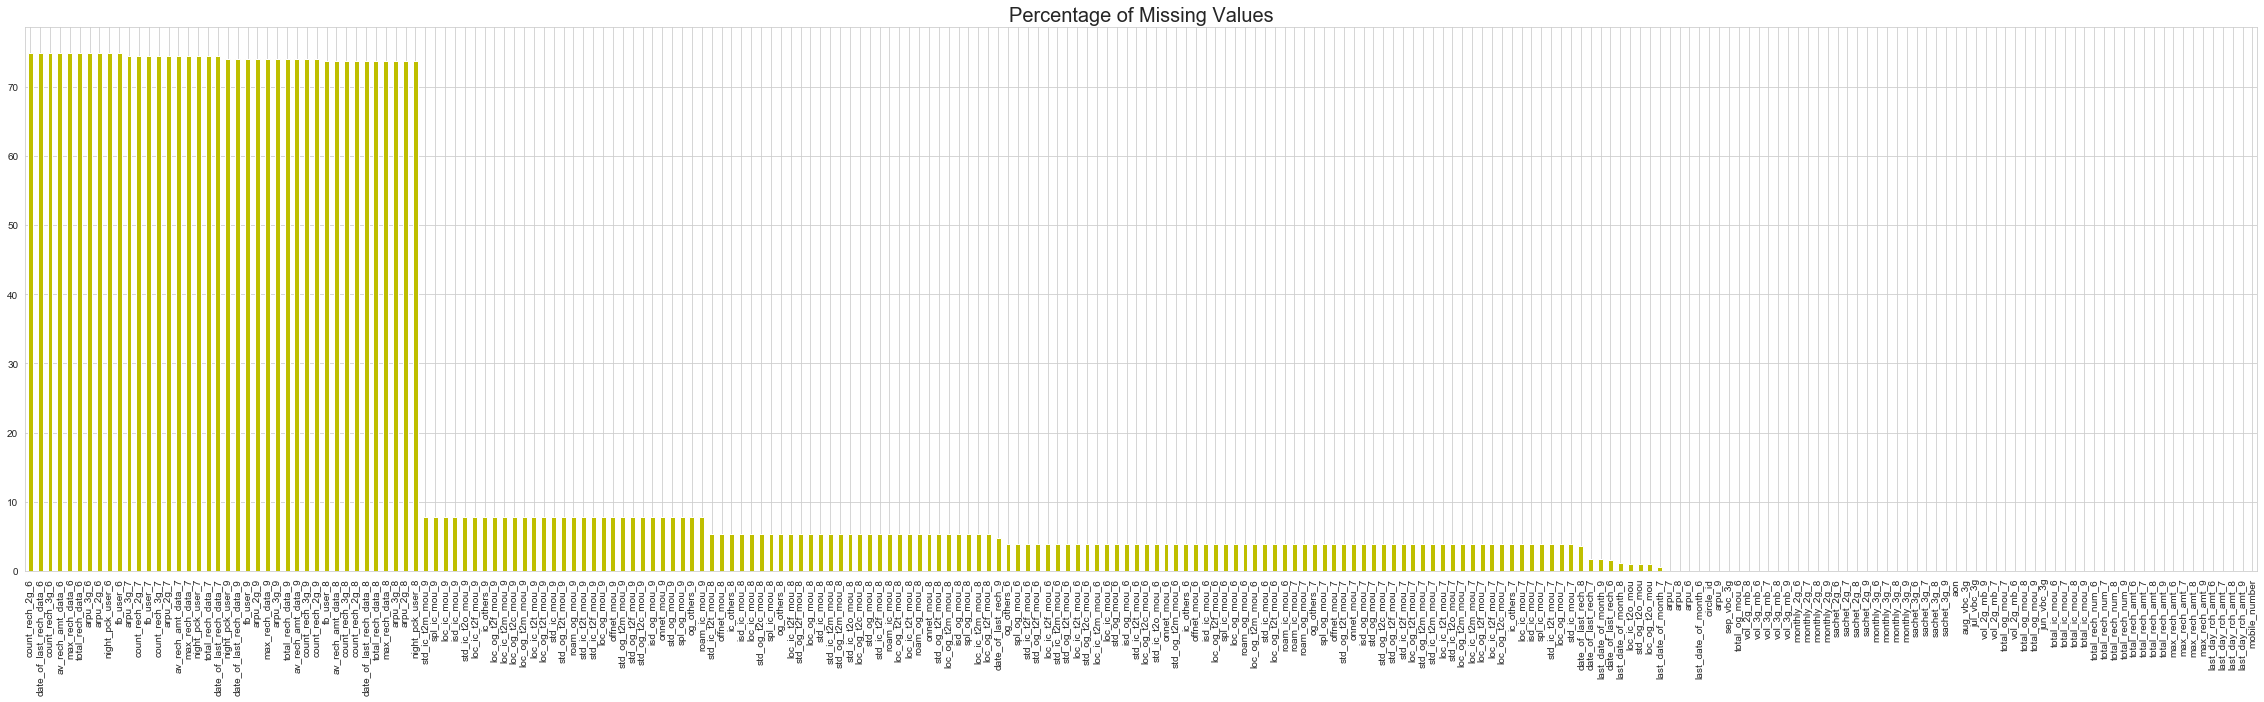

In [11]:
plt.figure(figsize=(40,10))
Null_Pcent.sort_values(ascending = False).plot(kind = 'bar', color = 'y')
plt.title('Percentage of Missing Values', fontsize = 20)
plt.show()

### Observations
- Vraiables that are related to data such as `date_of_last_rech_data_6`, `date_of_last_rech_data_7`,`date_of_last_rech_data_8`,   `date_of_last_rech_data_6` `total_rech_data_6`, `total_rech_data_7`, `total_rech_data_8`, `total_rech_data_9`,       
   `max_rech_data_6`, `max_rech_data_7`, `max_rech_data_8`, `max_rech_data_9`, `count_rech_2g_6`, `count_rech_2g_7` are having
   very high percentage of null values(**>70%**).
- Varibles like `onnet_mou_9`, `offnet_mou_9`, `roam_ic_mou_9`, `roam_og_mou_9`, `loc_og_t2t_mou_9` are having (**~8%**) of null values
- Varibale like `std_og_t2t_mou_8`, `std_og_t2f_mou_8`, `og_others_8`, `loc_ic_t2t_mou_8` etc are having (**~3%**) of null values.

#### Impute the Columns such as  `fb_user_` and `night_pck_user_` by creating a new category(-1) to avoide any impact on predictions

In [12]:
## Loop through each pf fb_user_ and night_pck_ column and impute it
for col in df.columns:
    if re.search('fb_user_|night_pck_user', col):
        df[col] = df[col].fillna(-1).astype(int)

#### Impute the columns such as `total_rech_data_6`, `total_rech_data_7`, `av_rech_amt_data_6`, `av_rech_amt_data_7` etc with zero

In [13]:
## Loop through each recharge column and impute it with zero
for col in df.columns:
    if re.search('rech', col): # exclude the columns that contain dates
        df[col].fillna(0, inplace = True)

In [14]:
# Get the no of missing values in each column
Null_Pcent = round((df.isnull().sum(axis = 0)/len(df.index)*100),2)
Null_Pcent

mobile_number               0.0000
circle_id                   0.0000
loc_og_t2o_mou              1.0200
std_og_t2o_mou              1.0200
loc_ic_t2o_mou              1.0200
last_date_of_month_6        0.0000
last_date_of_month_7        0.6000
last_date_of_month_8        1.1000
last_date_of_month_9        1.6600
arpu_6                      0.0000
arpu_7                      0.0000
arpu_8                      0.0000
arpu_9                      0.0000
onnet_mou_6                 3.9400
onnet_mou_7                 3.8600
onnet_mou_8                 5.3800
onnet_mou_9                 7.7500
offnet_mou_6                3.9400
offnet_mou_7                3.8600
offnet_mou_8                5.3800
offnet_mou_9                7.7500
roam_ic_mou_6               3.9400
roam_ic_mou_7               3.8600
roam_ic_mou_8               5.3800
roam_ic_mou_9               7.7500
roam_og_mou_6               3.9400
roam_og_mou_7               3.8600
roam_og_mou_8               5.3800
roam_og_mou_9       

#### Drop the columns, that are having null values > 70%. As these columns do not add values to the prediction

In [15]:
## Drop the columns from the dataframe that have more than 70% of null values
df = df.loc[:,df.columns[round((df.isnull().sum(axis = 0)/len(df.index)*100),2) < 70]]

print(df.shape)

(99999, 218)


#### Impute the categorical columns, that are having null values between 2 and 8% with a Mode.

In [16]:
## Impute the columns, that have 2 to 8% of missing values with a mode
cat_var = df.select_dtypes(include = 'object').columns.values
for col in df[cat_var].columns[round((df[cat_var].isnull().sum(axis = 0)/len(df.index)*100),2) >= 2]:
    df[col] = df[col].replace(np.nan, str(df[col].mode()))

#### Impute the continuous columns, that are having null values between 2 and 8% with a Median.

In [17]:
## Impute the columns, that have 3 to 5% of missing values with a median
num_var = df.select_dtypes(exclude = 'object').columns.values
for col in df[num_var].columns[round((df[num_var].isnull().sum(axis = 0)/len(df.index)*100),2) >= 2]:
    df[col] = df[col].replace(np.nan, df[col].median())

#### Reverify the missing values

In [18]:
# Get the no of missing values in each column
Null_Pcent = round((df.isnull().sum(axis = 0)/len(df.index)*100),2)
Null_Pcent

mobile_number              0.0000
circle_id                  0.0000
loc_og_t2o_mou             1.0200
std_og_t2o_mou             1.0200
loc_ic_t2o_mou             1.0200
last_date_of_month_6       0.0000
last_date_of_month_7       0.6000
last_date_of_month_8       1.1000
last_date_of_month_9       1.6600
arpu_6                     0.0000
arpu_7                     0.0000
arpu_8                     0.0000
arpu_9                     0.0000
onnet_mou_6                0.0000
onnet_mou_7                0.0000
onnet_mou_8                0.0000
onnet_mou_9                0.0000
offnet_mou_6               0.0000
offnet_mou_7               0.0000
offnet_mou_8               0.0000
offnet_mou_9               0.0000
roam_ic_mou_6              0.0000
roam_ic_mou_7              0.0000
roam_ic_mou_8              0.0000
roam_ic_mou_9              0.0000
roam_og_mou_6              0.0000
roam_og_mou_7              0.0000
roam_og_mou_8              0.0000
roam_og_mou_9              0.0000
loc_og_t2t_mou

Now, most of columns have less than **2%** of missing values, we can remove such rows

#### Impute the rows, where missing values are upto 2%

In [19]:
## Impute the columns, that have 3 to 5% of missing values with a mode
for col in df.columns[round((df.isnull().sum(axis = 0)/len(df.index)*100),2) >0]:
    df[col].fillna(0, inplace = True)

In [20]:
# Get the no of missing values in each column
Null_Pcent = round((df.isnull().sum(axis = 0)/len(df.index)*100),2)
Null_Pcent

mobile_number              0.0000
circle_id                  0.0000
loc_og_t2o_mou             0.0000
std_og_t2o_mou             0.0000
loc_ic_t2o_mou             0.0000
last_date_of_month_6       0.0000
last_date_of_month_7       0.0000
last_date_of_month_8       0.0000
last_date_of_month_9       0.0000
arpu_6                     0.0000
arpu_7                     0.0000
arpu_8                     0.0000
arpu_9                     0.0000
onnet_mou_6                0.0000
onnet_mou_7                0.0000
onnet_mou_8                0.0000
onnet_mou_9                0.0000
offnet_mou_6               0.0000
offnet_mou_7               0.0000
offnet_mou_8               0.0000
offnet_mou_9               0.0000
roam_ic_mou_6              0.0000
roam_ic_mou_7              0.0000
roam_ic_mou_8              0.0000
roam_ic_mou_9              0.0000
roam_og_mou_6              0.0000
roam_og_mou_7              0.0000
roam_og_mou_8              0.0000
roam_og_mou_9              0.0000
loc_og_t2t_mou

#### Now, all the columns with missing have been imputed/treated

In [21]:
df.shape

(99999, 218)

#### Check, if any of the columns has only one unique value

In [22]:
print('The following Columns have only one Unique Value ..')
print('\n')
var_with_1_val = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        var_with_1_val.append(col)
        print(col)

The following Columns have only one Unique Value ..


circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
std_ic_t2o_mou_9


#### Let's visualise these columns 

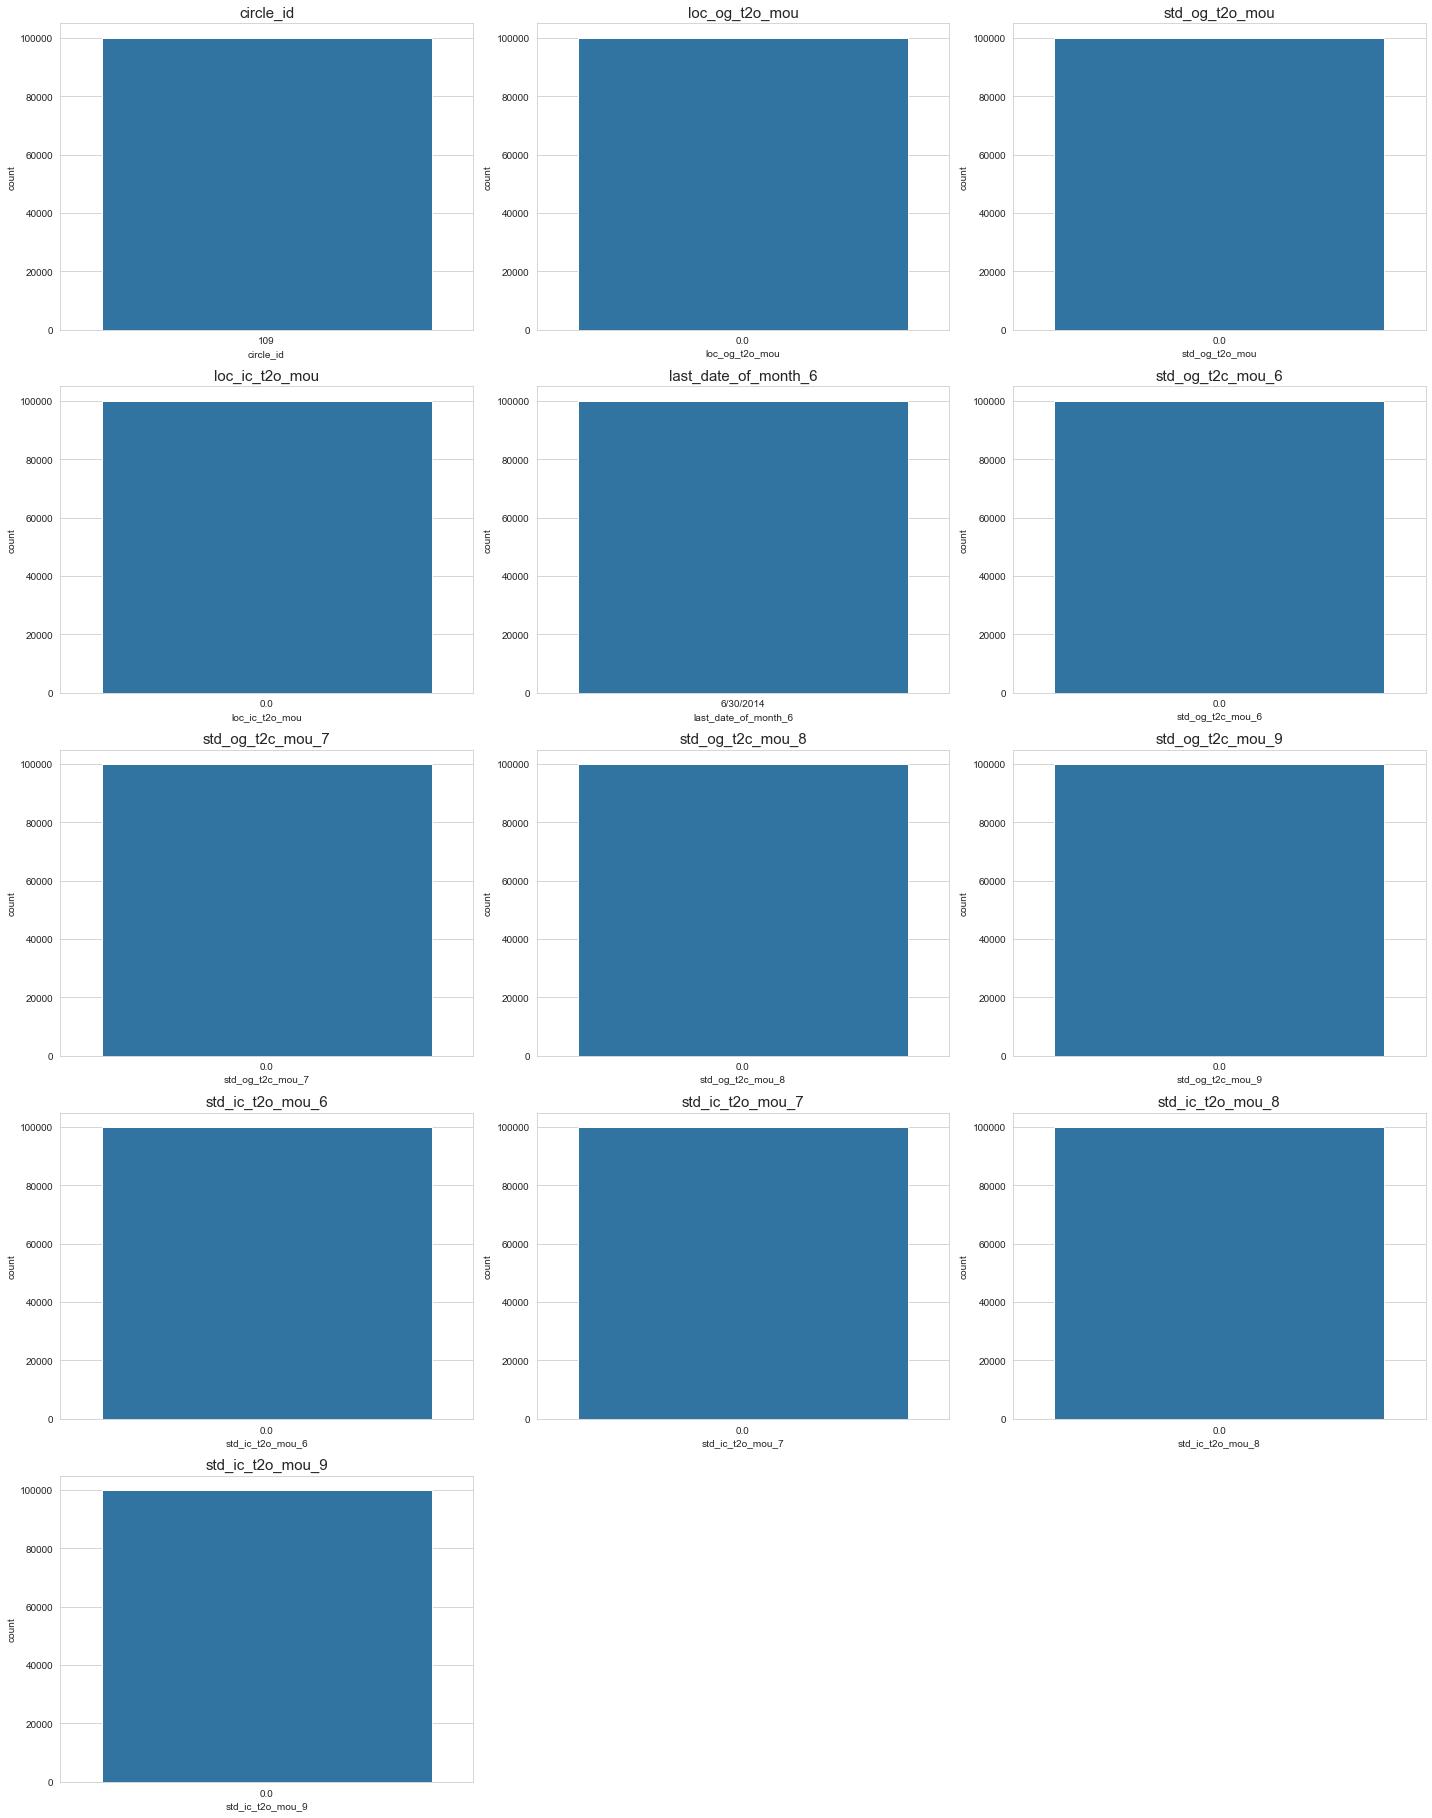

In [23]:
fig = plt.figure(figsize=(20,30))
l_row = 6
l_col = 3
l_pos = 1
i = 0
for col in var_with_1_val:
    fig.add_subplot(l_row, l_col,l_pos )
    plt.title(col, fontsize = 15)
    sns.countplot(data = df, x = col)
    l_pos = l_pos + 1
plt.tight_layout()
plt.show()

Since, these columns have only single value and hence, they do not add any variation and value to the prediction and should be dropped

In [24]:
# Drop the columns, that have only one unique value
df = df.loc[:, ~df.columns.isin(var_with_1_val)]

In [25]:
df.shape

(99999, 205)

In [26]:
df.dtypes

mobile_number                 int64
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2t_mou_9            

Drop the column `last_date_of_month_6`, `last_date_of_month_7`, `last_date_of_month_8` and `last_date_of_month_9`. As these do not add any value to the prediction

In [27]:
df.drop(['last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'], axis = 1, inplace = True)

### Check for any blank rows

In [28]:
df[df.isnull().all(axis = 1)]

Empty DataFrame
Columns: [mobile_number, arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, loc_ic_mou_9, std_ic_t2t_mou_6, std_ic_t2t_mou_7, std_ic_t2t_mou_8, std_ic_t2t_mou_9, std_ic_t2m_mou_6, std_ic_t2m_mou_7, std_ic_t2m_mou_8, std_ic_t2m_mou_9, std_ic_t2f_mou_6, std_ic_t2f_mou_7, std_ic_t2f_mou_8, ...]
Index: []

#### There are no blank rows, present in the dataset

### Visual Analysis of the Continuous Variables

In [29]:
## Get the continous variables into the python list num_var
num_var = list(df.select_dtypes(exclude = 'object').columns)

## Remove the variable mobile_number, as it is a unique identifier
num_var.remove('mobile_number')

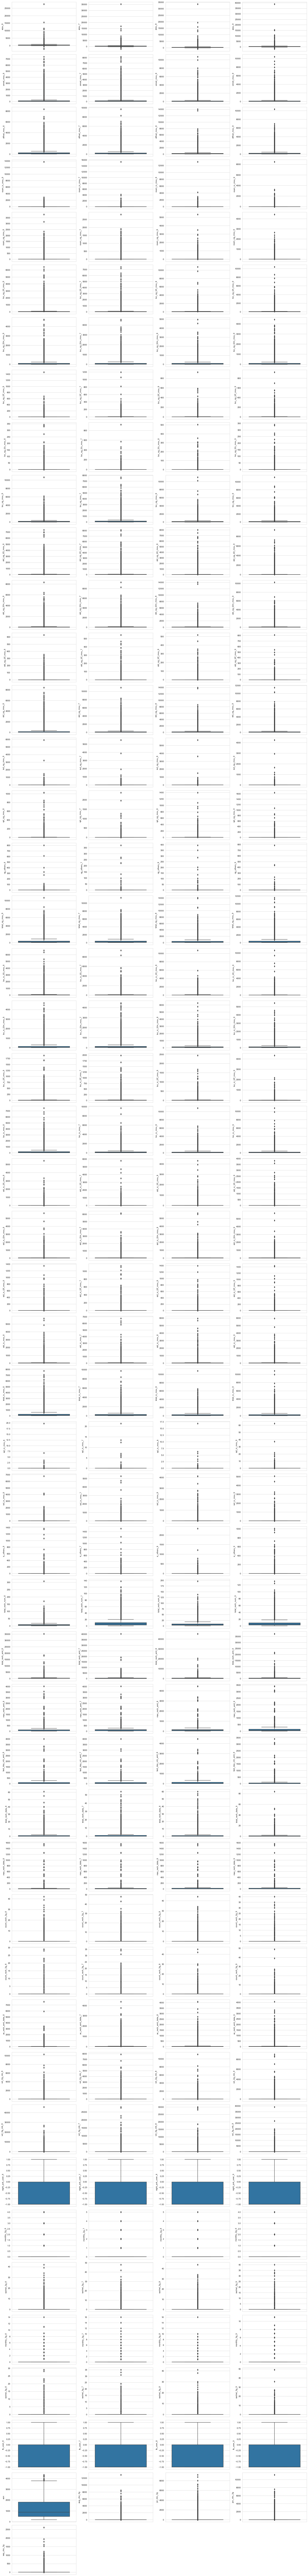

In [30]:
## Loop through each Continuous varible and plot the Boxplot
plt.figure(figsize = (20,170))
l_row = 50
l_pos = 1
for col in num_var:
    plt.subplot(l_row, 4, l_pos)
    sns.boxplot(y = col, data = df)
    l_pos = l_pos + 1
plt.tight_layout()
plt.show()

There are outliers present in most of the continous variables, but due to the large no of columns, it is not feasible to infer any other kind of analysis

### Filter the High Value Customers

In [31]:
# Create a new column avg_rech_first_2_months
df['avg_rech_first_2_months'] = df['total_rech_amt_6'] + df['total_rech_amt_7']


#Create a new column avg_rech_first_2_months_data
df['avg_rech_first_2_months_data'] = df['total_rech_data_6']*df['av_rech_amt_data_6'] + df['total_rech_data_7']*df['av_rech_amt_data_7']

In [32]:
df['avg_rech_first_2_months_amt'] = (df['avg_rech_first_2_months'] + df['avg_rech_first_2_months_data'])/2

In [33]:
print('70th Perentile of Average Recharge Amount =>', np.percentile(df['avg_rech_first_2_months_amt'], 70.0))

70th Perentile of Average Recharge Amount => 478.0


In [34]:
# Let's remove the customers, other than high value from the dataframe
df= df[(df['avg_rech_first_2_months_amt'] >= np.percentile(df['avg_rech_first_2_months_amt'], 70)) ]

In [35]:
# Let's verify the reduced dataframe
df.shape

(30001, 205)

##  3. Data Preparation

There are following dates variable with datatype `object`. Let's convert them to Pandas date format:
- `date_of_last_rech_6`
- `date_of_last_rech_7`
- `date_of_last_rech_8`
- `date_of_last_rech_9`
- `date_of_last_rech_data_6`
- `date_of_last_rech_data_7`
- `date_of_last_rech_data_8`
- `date_of_last_rech_data_9`

In [36]:
# Conver the datatype of the variables to Pandas Date
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])

df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])

df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])

df['date_of_last_rech_9'] = pd.to_datetime(df['date_of_last_rech_9'])



# Conver the datatype of the variables to Pandas Date
df['date_of_last_rech_data_6'] = pd.to_datetime(df['date_of_last_rech_data_6'])

df['date_of_last_rech_data_7'] = pd.to_datetime(df['date_of_last_rech_data_7'])

df['date_of_last_rech_data_8'] = pd.to_datetime(df['date_of_last_rech_data_8'])

df['date_of_last_rech_data_9'] = pd.to_datetime(df['date_of_last_rech_data_9'])

#### Create a new features `rech_day_6`, `rech_day_7`, `rech_day_8`, `rech_day_9` 

In [37]:
# Create new feature last_rech_day_6
df['last_rech_day_6'] = df['date_of_last_rech_6'].dt.day

# Create new feature last_rech_day_7
df['last_rech_day_7'] = df['date_of_last_rech_7'].dt.day

# Create new feature last_rech_day_8
df['last_rech_day_8'] = df['date_of_last_rech_8'].dt.day 

# Create new feature last_rech_day_9
df['last_rech_day_9'] = df['date_of_last_rech_9'].dt.day 


# Create new feature last_rech_day_data_6
df['last_rech_day_data_6'] = df['date_of_last_rech_data_6'].dt.day

# Create new feature last_rech_day_data_7
df['last_rech_day_data_7'] = df['date_of_last_rech_data_7'].dt.day

# Create new feature last_rech_day_data_8
df['last_rech_day_data_8'] = df['date_of_last_rech_data_8'].dt.day 

# Create new feature last_rech_day_data_9
df['last_rech_day_data_9'] = df['date_of_last_rech_data_9'].dt.day 

#### Drop the original Variables

In [38]:
# Drop the redundant variables
df.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'
        ,'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9' ], axis = 1, inplace = True)

In [39]:
df.dtypes

mobile_number                     int64
arpu_6                          float64
arpu_7                          float64
arpu_8                          float64
arpu_9                          float64
onnet_mou_6                     float64
onnet_mou_7                     float64
onnet_mou_8                     float64
onnet_mou_9                     float64
offnet_mou_6                    float64
offnet_mou_7                    float64
offnet_mou_8                    float64
offnet_mou_9                    float64
roam_ic_mou_6                   float64
roam_ic_mou_7                   float64
roam_ic_mou_8                   float64
roam_ic_mou_9                   float64
roam_og_mou_6                   float64
roam_og_mou_7                   float64
roam_og_mou_8                   float64
roam_og_mou_9                   float64
loc_og_t2t_mou_6                float64
loc_og_t2t_mou_7                float64
loc_og_t2t_mou_8                float64
loc_og_t2t_mou_9                float64


#### Create new ARPU feature for 2 and 3 months average

In [40]:
# average revenue per user for first two months average
df['arpu_2_mths_avg'] = (df['arpu_6']+df['arpu_7'])/2

# average revenue per user for first three months average
df['arpu_3_mths_avg'] = (df['arpu_6']+df['arpu_7']+df['arpu_8'])/3

In [41]:
# average recharge amount the first two months average 
df['avg_tot_rech_2_mths_avg'] = (df['total_rech_amt_6']+df['total_rech_amt_7'])/2

# average recharge amount the first three months average
df['avg_tot_rech_3_mths_avg'] = (df['total_rech_amt_6']+df['total_rech_amt_7']+df['total_rech_amt_8'])/3

In [42]:
# Convert Age on Network to yaers by dividing it by 365
df['aon']=df['aon']/365
df['aon'] = df['aon'].astype(int)

#### Derive the Target Variable `churn`, based on the below logic:
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

The attributes that we need to use to tag churners are:
- `total_ic_mou_9`
- `total_og_mou_9`
- `vol_2g_mb_9`
- `vol_3g_mb_9`

In [43]:
# Create a new function build_churn_flag, which will take df as an input and define the churn flag, as per the above logic
def build_churn_flag(ldf):
    if (ldf['total_ic_mou_9'] == 0) and (ldf['total_og_mou_9'] ==0) and (ldf['vol_2g_mb_9'] == 0) and (ldf['vol_3g_mb_9' == 0]):
        return 1
    else:
        return 0

In [44]:
# Create a new column 'churn_flag'
df['churn'] = df.apply(build_churn_flag, axis =1)

In [45]:
# Get an overview of the column and logic applied
df[['mobile_number', 'total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'churn']].head()

mobile_number  total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  \
0      7000842753          0.0000          0.0000       0.0000       0.0000   
7      7000701601          0.0000          0.0000       0.0000       0.0000   
8      7001524846         34.9100        142.1800       0.0000       0.0000   
21     7002124215        252.6100       1031.5300       0.0000       0.0000   
23     7000887461        127.4800        127.6300      13.9300     314.7400   

    churn  
0       1  
7       1  
8       0  
21      0  
23      0

#### Check the Churn Rate

In [46]:
churn_rate = 100*(df['churn'].sum()/len(df.index))
churn_rate

8.463051231625613

We have churn rate of approximately **8.4%***

#### Drop the columns that belong to Churn Phase that is ended with '_9'

In [47]:
# Loop through each column in the dataframe and check if the column belongs to churn phase(_9) and store it in a list
churn_phase_col = []
for col in df.columns:
    if re.search('[_9]$', col):
        churn_phase_col.append(col)

churn_phase_col

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'last_rech_day_9',
 'last_rech_day_data_9']

In [48]:
## Drop the columns
df.drop(churn_phase_col, axis = 1, inplace = True)

df.shape

(30001, 161)

#### Check for Outliers in the Continuous variables

In [49]:
## Get all the numerical variabels in a list
num_var = list(df.select_dtypes(exclude = 'object'))

In [50]:
## Remove mobile_numnber and churn from the list
num_var.remove('mobile_number')
num_var.remove('churn')

In [51]:
df[num_var].describe(percentiles = [.05, .25, .5, .75, .95, .99])

arpu_6     arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 30001.0000 30001.0000 30001.0000   30001.0000   30001.0000   30001.0000   
mean    558.4908   560.7822   508.5980     261.4163     268.3980     235.3789   
std     460.6405   479.7769   501.9620     459.3134     479.6901     457.8445   
min   -2258.7090 -2014.0450  -945.8080       0.0000       0.0000       0.0000   
5%      112.5100   114.2730     9.5500       0.0000       0.0000       0.0000   
25%     309.8650   309.8260   231.4730      20.0100      18.9300      15.6300   
50%     481.6940   480.9430   427.5850      84.5800      82.8100      65.6100   
75%     699.9430   698.3150   661.4910     290.4400     290.2400     239.9600   
95%    1240.9640  1261.2720  1255.0190    1135.4400    1185.7900    1074.5900   
99%    1985.1150  1999.5000  1986.6220    2151.7400    2201.9600    2159.1100   
max   27731.0880 35145.8340 33543.6240    7376.7100    8157.7800   10752.5600   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count    30001.0000    30001.0000    30001.0000     30001.0000     30001.0000   
mean       375.4435      379.7452      338.6827        16.1104        12.6425   
std        481.3385      497.8262      479.8824        76.3022        75.7859   
min          0.0000        0.0000        0.0000         0.0000         0.0000   
5%           3.1900        2.6900        0.8600         0.0000         0.0000   
25%         80.7100       78.5400       63.1900         0.0000         0.0000   
50%        222.5400      220.0300      182.7900         0.0000         0.0000   
75%        487.9400      494.0100      438.8900         0.0000         0.0000   
95%       1256.6100     1272.2900     1167.5400        84.5400        55.6400   
99%       2326.3600     2410.8900     2193.1300       342.4400       280.4600   
max       8362.3600     9667.1300    14007.3400      2613.3100      3813.2900   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count     30001.0000     30001.0000     30001.0000     30001.0000   
mean         12.5006        26.5715        20.1521        19.8656   
std          74.1253       116.2055        96.1004       104.7190   
min           0.0000         0.0000         0.0000         0.0000   
5%            0.0000         0.0000         0.0000         0.0000   
25%           0.0000         0.0000         0.0000         0.0000   
50%           0.0000         0.0000         0.0000         0.0000   
75%           0.0000         0.0000         0.0000         0.0000   
95%          56.3500       145.4100       104.2400       100.5100   
99%         282.1900       530.7100       438.5900       427.0300   
max        4169.8100      3775.1100      2812.0400      5337.0400   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count        30001.0000        30001.0000        30001.0000        30001.0000   
mean            84.7011           85.8821           78.5361          163.9887   
std            228.7196          240.4569          227.2273          249.6899   
min              0.0000            0.0000            0.0000            0.0000   
5%               0.0000            0.0000            0.0000            0.0000   
25%              5.2400            5.5300            4.3600           21.8400   
50%             24.3300           24.6800           20.7300           77.1800   
75%             77.9800           78.3400           72.0400          208.9300   
95%            322.7400          324.3900          298.7800          604.3800   
99%           1006.3600         1018.5300          913.3300         1136.9600   
max           6431.3300         7400.6600        10752.5600         4729.7400   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count        30001.0000        30001.0000        30001.0000        30001.0000   
mean           163.7336          153.3362            6.3441            6.4237   
std            241.

In [52]:
## Loop through each Continuous varible and plot the Boxplot

def check_outliers():
    plt.figure(figsize = (20,170))
    l_row = 45
    l_pos = 1
    for col in num_var:
        plt.subplot(l_row, 4, l_pos)
        sns.boxplot(y = col, data = df)
        l_pos = l_pos + 1
    plt.tight_layout()
    plt.show()

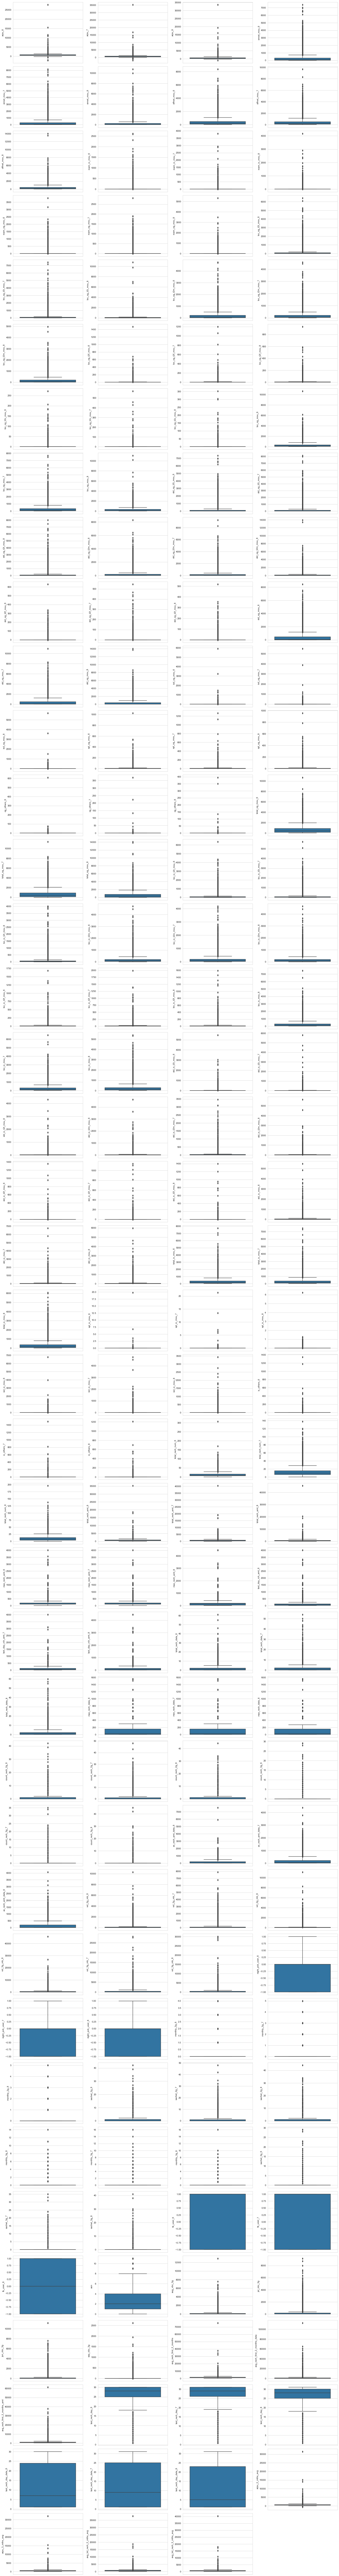

In [53]:
check_outliers()

- It is evident that there are outliers present in almost all the columns.
- Let's remove the outliers statistically using the IQR method

Firstly, remove the column `last_rech_day_6`, `last_rech_day_7`, `last_rech_day_8`, `last_rech_day_9` from the list

In [54]:
# Get the list of columns(that do not have outliers) in a list
l_col = ['last_rech_day_6', 'last_rech_day_7', 'last_rech_day_8', 'last_rech_day_data_6', 'last_rech_day_data_7', 'last_rech_day_data_8']

In [55]:
# Loop through each column and remove them from the num_var list
for col in l_col:
    num_var.remove(col)

#### Cap the outliers
Let's cap the outliers to avoide any impact on the prediction of the models

In [56]:
for col in num_var:
    Q1 = df[col].quantile(0.05)
    Q3 = df[col].quantile(0.95)
    df[l_col][df[l_col] <= Q1] = Q1
    df[l_col][df[l_col] >= Q3] = Q3

In [57]:
df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753  197.3850  214.8160  213.8030      34.3100      32.3300   
7      7000701601 1069.1800 1349.8500 3171.4800      57.8400      54.6800   
8      7001524846  378.7210  492.2230  137.3620     413.6900     351.0300   
21     7002124215  514.4530  597.7530  637.7600     102.4100     132.1100   
23     7000887461   74.3500  193.8970  366.9660      48.9600      50.6600   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0        0.0000       96.3100       91.7350        0.0000         0.0000   
7       52.2900      453.4300      567.1600      325.9100        16.2300   
8       35.0800       94.6600       80.6300      136.4800         0.0000   
21      85.1400      757.9300      896.6800      983.3900         0.0000   
23      33.5800       85.4100       89.3600      205.8900         0.0000   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          0.0000         0.0000         0.0000         0.0000         0.0000   
7         33.4900        31.6400        23.7400        12.5900        38.0600   
8          0.0000         0.0000         0.0000         0.0000         0.0000   
21         0.0000         0.0000         0.0000         0.0000         0.0000   
23         0.0000         0.0000         0.0000         0.0000         0.0000   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0            11.9100           11.6100            0.0000           41.0300   
7            51.3900           31.3800           40.2800          308.6300   
8           297.1300          217.5900           12.4900           80.9600   
21            4.4800            6.1600           23.3400           91.8100   
23           48.9600           50.6600           33.5800           82.9400   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            40.4300            0.0000            0.0000            0.0000   
7           447.3800          162.2800           62.1300           55.1400   
8            70.5800           50.5400            0.0000            0.0000   
21           87.9300          104.8100            0.7500            0.0000   
23           83.0100          148.5600            0.0000            0.0000   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0             0.0000            0.0000            0.0000            0.0000   
7            53.2300            0.0000            0.0000            0.0000   
8             0.0000            0.0000            0.0000            7.1500   
21            1.5800            0.0000            0.0000            0.0000   
23            0.0000            0.0000            0.0000           17.7100   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        65.1100       63.6850        0.0000            0.0000   
7       422.1600      533.9100      255.7900            4.3000   
8       378.0900      288.1800       63.0400          116.5600   
21       97.0400       94.0900      129.7400           97.9300   
23      131.9100      133.6800      182.1400            0.0000   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0             0.0000            0.0000            3.9500            3.6350   
7            23.2900           12.0100           49.8900           31.7600   
8           133.4300           22.5800           13.6900           10.0400   
21          125.9400           61.7900          665.3600          808.7400   
23            0.0000            0.0000            2.3600            6.3500   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             0.0000            0.0000            0.0000            0.0000   
7            49.1400            6.6600           20.0800           16.6800   
8            75.6900            0.0000            0.0000            0.0000   
21          

### Reverify the Continuos Variables 

In [58]:
df[num_var].describe(percentiles =[.25, .50, .75, .95, .99])

arpu_6     arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 30001.0000 30001.0000 30001.0000   30001.0000   30001.0000   30001.0000   
mean    558.4908   560.7822   508.5980     261.4163     268.3980     235.3789   
std     460.6405   479.7769   501.9620     459.3134     479.6901     457.8445   
min   -2258.7090 -2014.0450  -945.8080       0.0000       0.0000       0.0000   
25%     309.8650   309.8260   231.4730      20.0100      18.9300      15.6300   
50%     481.6940   480.9430   427.5850      84.5800      82.8100      65.6100   
75%     699.9430   698.3150   661.4910     290.4400     290.2400     239.9600   
95%    1240.9640  1261.2720  1255.0190    1135.4400    1185.7900    1074.5900   
99%    1985.1150  1999.5000  1986.6220    2151.7400    2201.9600    2159.1100   
max   27731.0880 35145.8340 33543.6240    7376.7100    8157.7800   10752.5600   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count    30001.0000    30001.0000    30001.0000     30001.0000     30001.0000   
mean       375.4435      379.7452      338.6827        16.1104        12.6425   
std        481.3385      497.8262      479.8824        76.3022        75.7859   
min          0.0000        0.0000        0.0000         0.0000         0.0000   
25%         80.7100       78.5400       63.1900         0.0000         0.0000   
50%        222.5400      220.0300      182.7900         0.0000         0.0000   
75%        487.9400      494.0100      438.8900         0.0000         0.0000   
95%       1256.6100     1272.2900     1167.5400        84.5400        55.6400   
99%       2326.3600     2410.8900     2193.1300       342.4400       280.4600   
max       8362.3600     9667.1300    14007.3400      2613.3100      3813.2900   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count     30001.0000     30001.0000     30001.0000     30001.0000   
mean         12.5006        26.5715        20.1521        19.8656   
std          74.1253       116.2055        96.1004       104.7190   
min           0.0000         0.0000         0.0000         0.0000   
25%           0.0000         0.0000         0.0000         0.0000   
50%           0.0000         0.0000         0.0000         0.0000   
75%           0.0000         0.0000         0.0000         0.0000   
95%          56.3500       145.4100       104.2400       100.5100   
99%         282.1900       530.7100       438.5900       427.0300   
max        4169.8100      3775.1100      2812.0400      5337.0400   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count        30001.0000        30001.0000        30001.0000        30001.0000   
mean            84.7011           85.8821           78.5361          163.9887   
std            228.7196          240.4569          227.2273          249.6899   
min              0.0000            0.0000            0.0000            0.0000   
25%              5.2400            5.5300            4.3600           21.8400   
50%             24.3300           24.6800           20.7300           77.1800   
75%             77.9800           78.3400           72.0400          208.9300   
95%            322.7400          324.3900          298.7800          604.3800   
99%           1006.3600         1018.5300          913.3300         1136.9600   
max           6431.3300         7400.6600        10752.5600         4729.7400   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count        30001.0000        30001.0000        30001.0000        30001.0000   
mean           163.7336          153.3362            6.3441            6.4237   
std            241.1475          232.7645           22.1236           21.9442   
min              0.0000            0.0000            0.0000            0.0000   
25%             23.6800           19.0900            0.0000            0.0000   
50%             78.8800           67.7600            0.0000            0.1000   
75%    

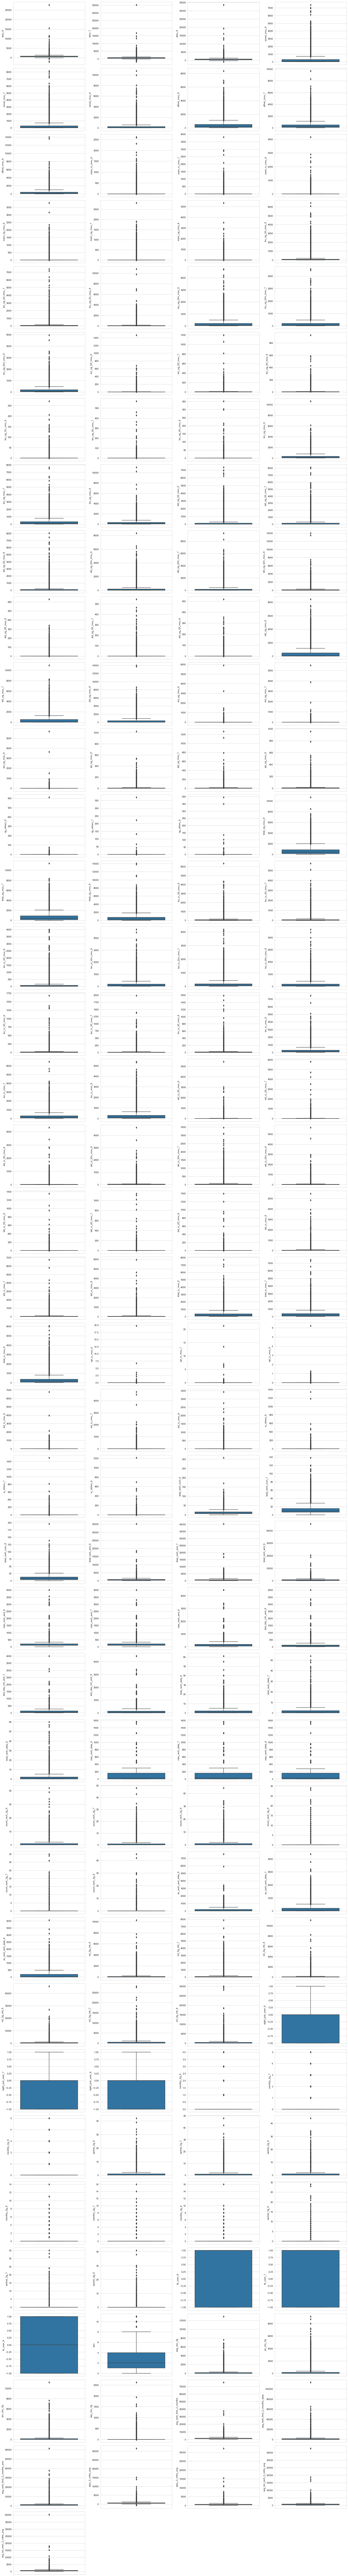

In [59]:
check_outliers()

In [60]:
df.shape

(30001, 161)

#### Check, the data imbalance in all the continous variables

In [61]:
## Loop through each Continuous varible and plot the Distplot
def check_dist():
    plt.figure(figsize = (20,170))
    l_row = 45
    l_pos = 1
    for col in num_var:
        plt.subplot(l_row, 4, l_pos)
        sns.distplot(df[col])
        l_pos = l_pos + 1
    plt.tight_layout()
    plt.show()

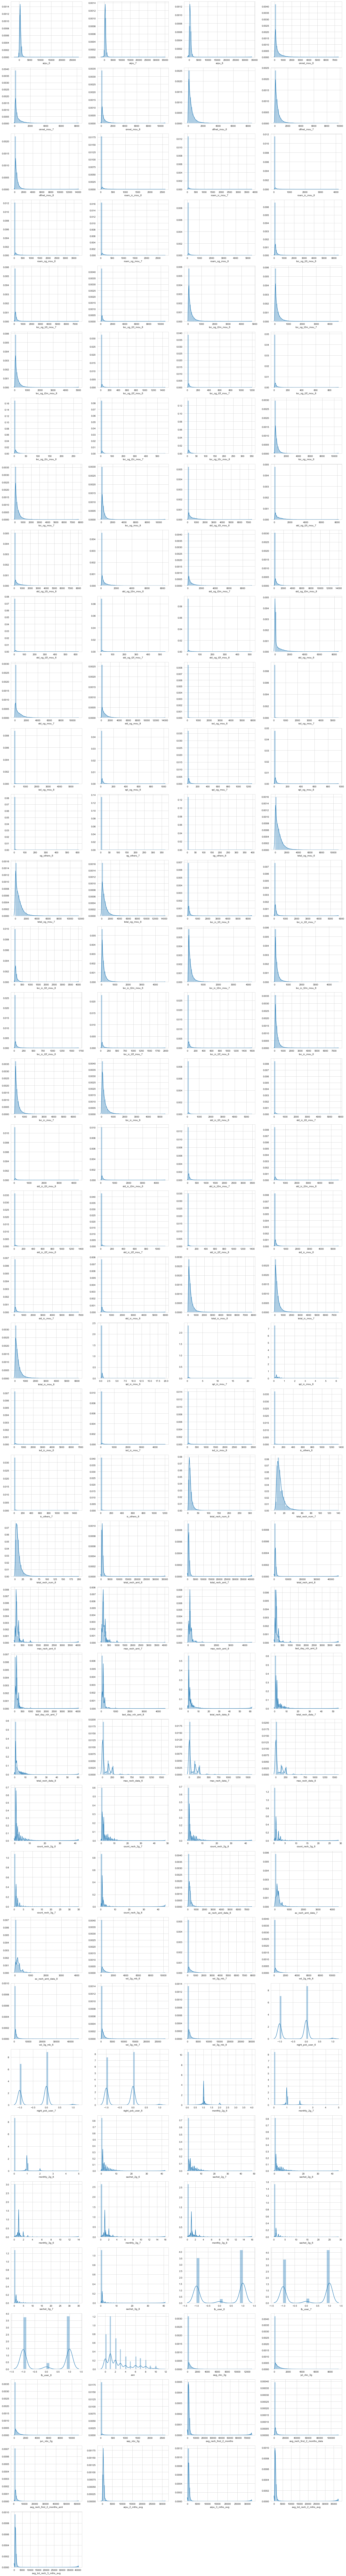

In [62]:
check_dist()

## EDA
### Univariate And Bivariate Analysis

#### Create Functions for Univariate And Bivariate Analysis

In [63]:
# Create function for Univariate Analysis
def plot_univariate(lvar):
    print(df[lvar].describe())
    plt.figure(figsize = (10, 8))
    sns.distplot(df[lvar])
    plt.title('Univariate Analysis of Variable ' + lvar, fontsize = 15)
    plt.show()

In [64]:
# Create function for Bivariate Analysis
def plot_bivariate(lvar1, lvar2):
    plt.figure(figsize = (10, 8))
    sns.boxplot(lvar1, lvar2, data = df)
    plt.title('Bivariate Analysis of Variables ' + lvar1 + 'And ' + lvar2, fontsize = 15)
    plt.show()

### Univariate Analysis

#### Plot the variable `aon`

count   30001.0000
mean        2.8044
std         2.6692
min         0.0000
25%         1.0000
50%         2.0000
75%         4.0000
max        11.0000
Name: aon, dtype: float64


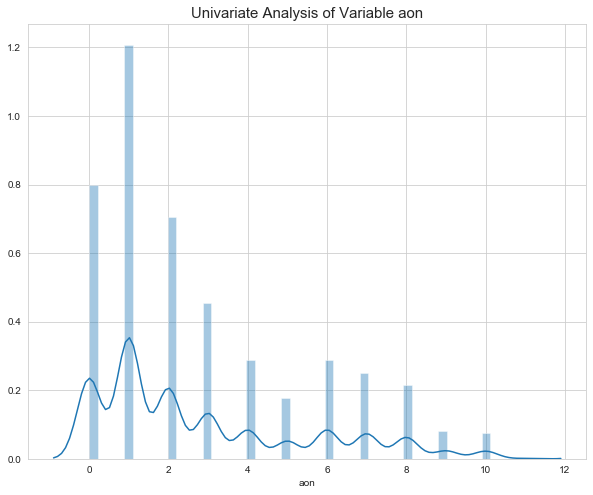

In [65]:
plot_univariate('aon')

#### Plot the variable `arpu_2_mths_avg`

count   30001.0000
mean      559.6365
std       429.9091
min      -749.7830
25%       345.2890
50%       484.8595
75%       674.5710
max     31438.4610
Name: arpu_2_mths_avg, dtype: float64


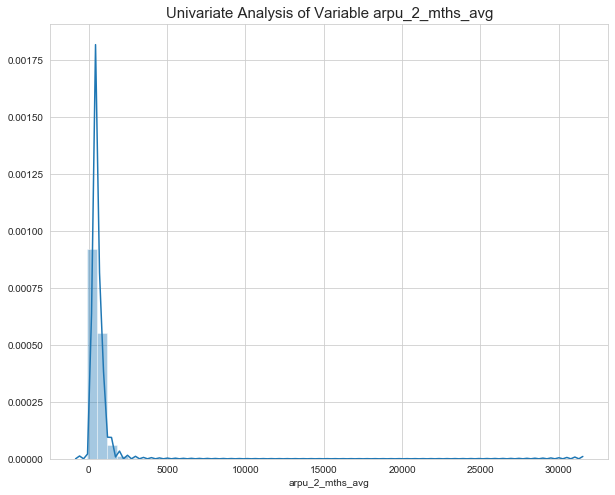

In [66]:
plot_univariate('arpu_2_mths_avg')

#### Plot the variable `arpu_3_mths_avg`

count   30001.0000
mean      542.6237
std       426.9465
min        40.5340
25%       325.7407
50%       469.7713
75%       659.9633
max     32140.1820
Name: arpu_3_mths_avg, dtype: float64


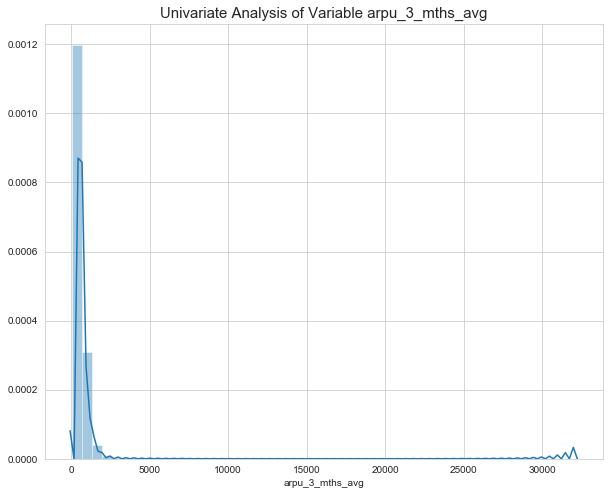

In [67]:
plot_univariate('arpu_3_mths_avg')

#### Plot the variable `avg_tot_rech_2_mths_avg`

count   30001.0000
mean      660.6152
std       515.1734
min         0.0000
25%       409.0000
50%       568.5000
75%       795.5000
max     37762.5000
Name: avg_tot_rech_2_mths_avg, dtype: float64


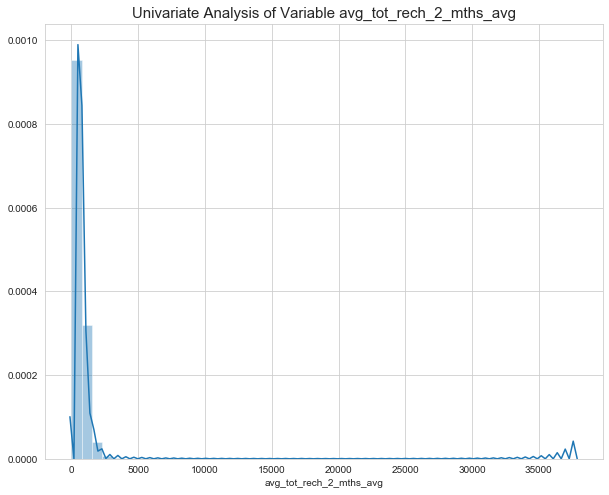

In [68]:
plot_univariate('avg_tot_rech_2_mths_avg')

#### Plot the variable `avg_tot_rech_3_mths_avg`

count   30001.0000
mean      635.1986
std       512.4058
min         0.0000
25%       376.3333
50%       549.0000
75%       773.3333
max     40281.6667
Name: avg_tot_rech_3_mths_avg, dtype: float64


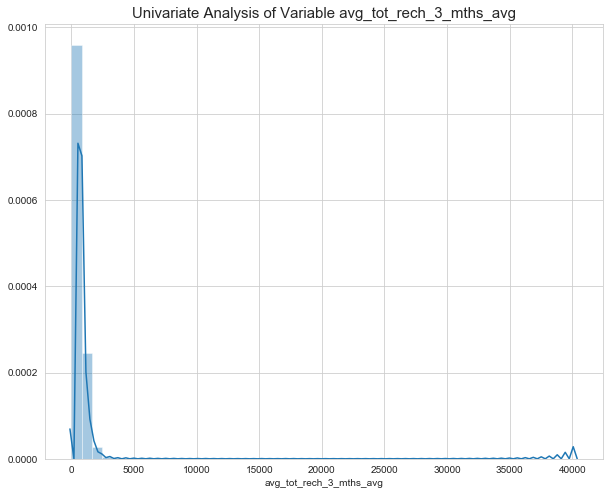

In [69]:
plot_univariate('avg_tot_rech_3_mths_avg')

### Bivariate Analysis

#### Plot the variables `aon` and `churn`

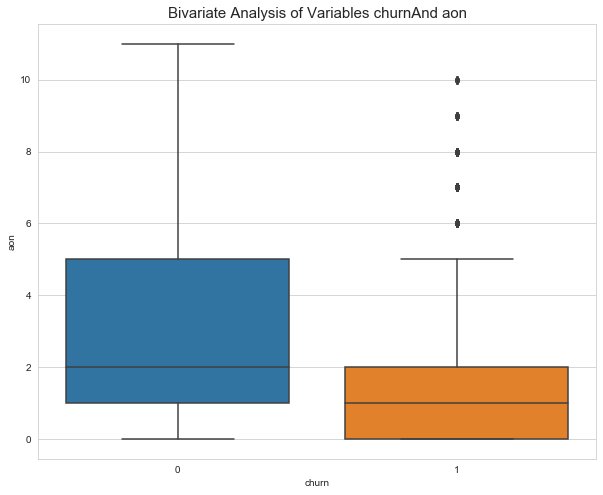

In [70]:
plot_bivariate('churn', 'aon')

#### Plot the variables `aon` and `arpu_3_mths_avg`

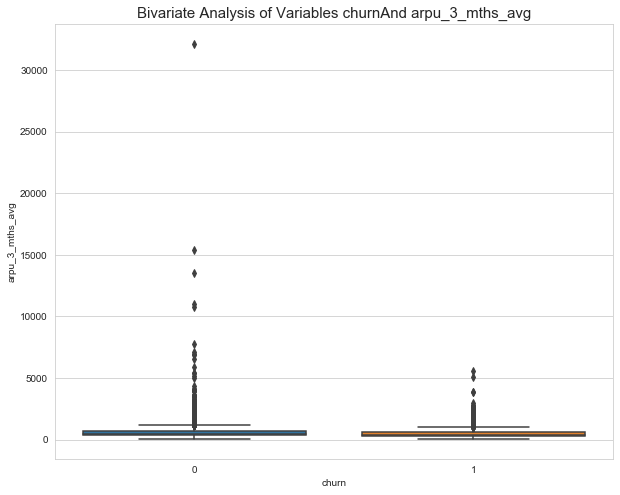

In [71]:
plot_bivariate('churn', 'arpu_3_mths_avg')

#### Plot the variables `aon` and `avg_tot_rech_3_mths_avg`

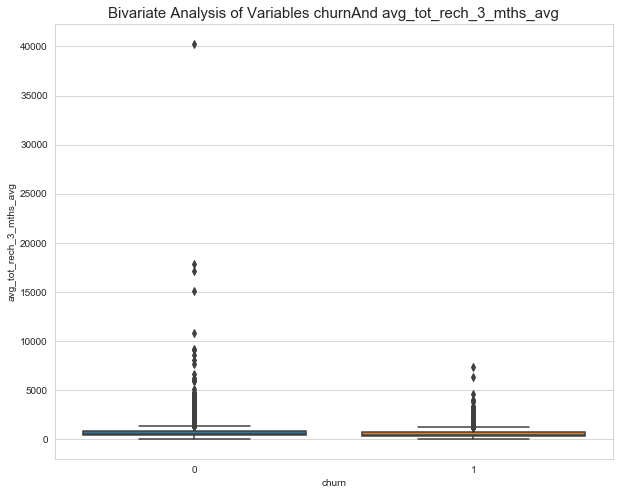

In [72]:
plot_bivariate('churn', 'avg_tot_rech_3_mths_avg')

#### Plot the variables `churn` and `arpu_3_mths_avg`

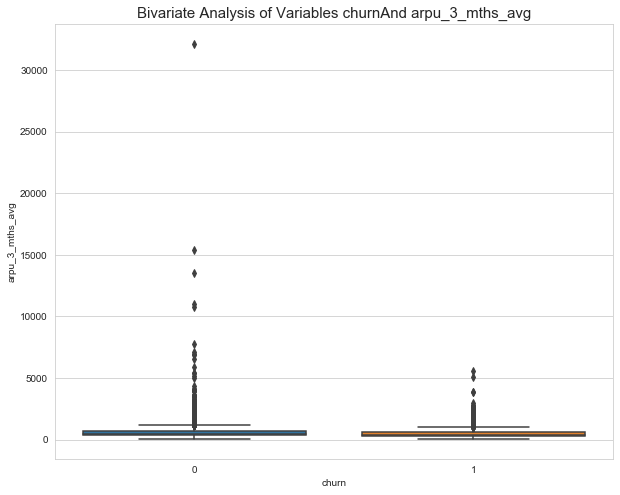

In [73]:
plot_bivariate('churn', 'arpu_3_mths_avg')

#### Plot the variables `churn` and `avg_tot_rech_3_mths_avg`

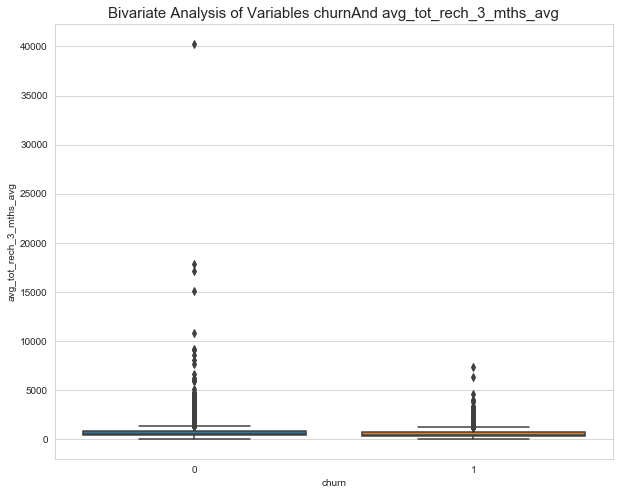

In [74]:
plot_bivariate('churn', 'avg_tot_rech_3_mths_avg')

##  4. Model Building
Let's start by splitting the data into a training set and a test set.

In [75]:
# Putting feature variable to X
X = df.drop(['mobile_number', 'churn'],axis=1)

# Putting response variable to y
y = df['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

#### Split the data into train and test

In [76]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Feature Standardization

In [77]:
# Create an instance of StandardScaler Class
scaler = StandardScaler()

# Fit and Transform the training dataset
X_train = scaler.fit_transform(X_train)

In [78]:
# Verify the shape of scaled DF
X_train.shape

(21000, 159)

### Method #1  Model Building Using PCA
**Note -**

- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [79]:
# Get the shape of the train dataset
X_train.shape

(21000, 159)

In [80]:
# Initialize an instance of PCA class
pca = PCA(random_state = 42)

In [81]:
# Fit the PCA
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

#### Components from the PCA

In [82]:
pca.components_

array([[ 1.35992389e-01,  1.39284882e-01,  1.26462096e-01, ...,
         1.47880354e-01,  1.49743767e-01,  1.47716732e-01],
       [ 1.29894977e-01,  1.40047518e-01,  1.45675098e-01, ...,
         1.53556289e-01,  1.42828073e-01,  1.51751417e-01],
       [ 7.22076617e-02,  9.57698946e-02,  8.33788528e-02, ...,
         9.29083116e-02,  8.98237126e-02,  9.27359507e-02],
       ...,
       [ 0.00000000e+00, -3.01576343e-16,  8.63872421e-03, ...,
        -2.21123285e-02,  5.00353585e-02, -5.95621228e-01],
       [-0.00000000e+00,  2.73869652e-16,  2.14359570e-02, ...,
        -5.48690885e-02, -2.76741505e-02, -1.43760968e-02],
       [ 4.56608899e-01,  4.86435952e-01,  1.42633124e-01, ...,
        -3.65094477e-01, -9.71445147e-17, -2.05998413e-16]])

In [83]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'Feature':colnames, 'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'PC4':pca.components_[3]})
pcs_df

Feature     PC1     PC2     PC3     PC4
0                          arpu_6  0.1360  0.1299  0.0722  0.0320
1                          arpu_7  0.1393  0.1400  0.0958  0.0268
2                          arpu_8  0.1265  0.1457  0.0834  0.0149
3                     onnet_mou_6  0.1063 -0.0190  0.0700 -0.0382
4                     onnet_mou_7  0.1124 -0.0166  0.0860 -0.0470
5                     onnet_mou_8  0.1064 -0.0034  0.0804 -0.0522
6                    offnet_mou_6  0.1359  0.0261  0.0340 -0.0368
7                    offnet_mou_7  0.1411  0.0270  0.0536 -0.0401
8                    offnet_mou_8  0.1295  0.0395  0.0471 -0.0457
9                   roam_ic_mou_6  0.0234  0.0100  0.0085  0.0274
10                  roam_ic_mou_7  0.0177  0.0089  0.0083  0.0363
11                  roam_ic_mou_8  0.0191  0.0137  0.0117  0.0316
12                  roam_og_mou_6  0.0343  0.0034  0.0298  0.0372
13                  roam_og_mou_7  0.0330  0.0069  0.0327  0.0462
14                  roam_og_mou_8  0.0319  0.0113  0.0322  0.0411
15               loc_og_t2t_mou_6  0.0554  0.0441 -0.0708 -0.0782
16               loc_og_t2t_mou_7  0.0586  0.0451 -0.0626 -0.0819
17               loc_og_t2t_mou_8  0.0575  0.0492 -0.0616 -0.0801
18               loc_og_t2m_mou_6  0.0829  0.0727 -0.1191 -0.0700
19               loc_og_t2m_mou_7  0.0887  0.0768 -0.1167 -0.0749
20               loc_og_t2m_mou_8  0.0835  0.0818 -0.1138 -0.0745
21               loc_og_t2f_mou_6  0.0319  0.0465 -0.0730  0.0162
22               loc_og_t2f_mou_7  0.0331  0.0496 -0.0749  0.0160
23               loc_og_t2f_mou_8  0.0325  0.0508 -0.0780  0.0144
24               loc_og_t2c_mou_6  0.0073  0.0029  0.0183 -0.0291
25               loc_og_t2c_mou_7  0.0092  0.0002  0.0266 -0.0291
26               loc_og_t2c_mou_8  0.0116  0.0042  0.0278 -0.0314
27                   loc_og_mou_6  0.0903  0.0777 -0.1261 -0.0924
28                   loc_og_mou_7  0.0967  0.0815 -0.1198 -0.0998
29                   loc_og_mou_8  0.0913  0.0859 -0.1157 -0.0972
30               std_og_t2t_mou_6  0.0860 -0.0466  0.1166 -0.0034
31               std_og_t2t_mou_7  0.0915 -0.0456  0.1314 -0.0105
32               std_og_t2t_mou_8  0.0864 -0.0333  0.1258 -0.0182
33               std_og_t2m_mou_6  0.0938 -0.0288  0.1061 -0.0115
34               std_og_t2m_mou_7  0.0995 -0.0255  0.1179 -0.0160
35               std_og_t2m_mou_8  0.0909 -0.0140  0.1106 -0.0223
36               std_og_t2f_mou_6  0.0193  0.0199 -0.0290  0.0212
37               std_og_t2f_mou_7  0.0203  0.0215 -0.0260  0.0204
38               std_og_t2f_mou_8  0.0189  0.0222 -0.0297  0.0169
39                   std_og_mou_6  0.1204 -0.0499  0.1482 -0.0095
40                   std_og_mou_7  0.1278 -0.0467  0.1655 -0.0173
41                   std_og_mou_8  0.1175 -0.0307  0.1555 -0.0264
42                   isd_og_mou_6  0.0520  0.0715  0.0613  0.0372
43                   isd_og_mou_7  0.0549  0.0767  0.0646  0.0392
44                   isd_og_mou_8  0.0533  0.0741  0.0632  0.0372
45                   spl_og_mou_6  0.0222  0.0102  0.0365 -0.0393
46                   spl_og_mou_7  0.0276  0.0057  0.0461 -0.0432
47                   spl_og_mou_8  0.0251  0.0062  0.0416 -0.0509
48                    og_others_6  0.0103 -0.0049  0.0119 -0.0226
49                    og_others_7  0.0065  0.0067 -0.0052  0.0050
50                    og_others_8  0.0051  0.0044 -0.0046  0.0020
51                 total_og_mou_6  0.1606  0.0051  0.0654 -0.0587
52                 total_og_mou_7  0.1697  0.0069  0.0907 -0.0669
53                 total_og_mou_8  0.1545  0.0240  0.0806 -0.0731
54               loc_ic_t2t_mou_6  0.0294  0.0490 -0.1183 -0.0945
55               loc_ic_t2t_mou_7  0.0325  0.0541 -0.1186 -0.0991
56               loc_ic_t2t_mou_8  0.0321  0.0570 -0.1158 -0.0973
57               loc_ic_t2m_mou_6  0.0493  0.0779 -0.1623 -0.1061
58               loc_ic_t2m_mou_7  0.0533  0.0853 -0.1615 -0.1123
59               loc_ic_t2m_mou_8  0.0497  0.0866 -0.1582 -0.1111


#### Check the explained variance ratio for each component

In [84]:
pca.explained_variance_ratio_

array([1.24251112e-01, 9.28299419e-02, 6.57323849e-02, 5.37753960e-02,
       3.80910863e-02, 3.47851493e-02, 2.75078418e-02, 2.68706596e-02,
       2.41373033e-02, 2.14617032e-02, 2.02913430e-02, 1.87016890e-02,
       1.78266592e-02, 1.75725608e-02, 1.67450447e-02, 1.59952972e-02,
       1.51409848e-02, 1.39744519e-02, 1.30519524e-02, 1.25846035e-02,
       1.22591190e-02, 1.21681795e-02, 1.12680136e-02, 1.08355296e-02,
       9.94448834e-03, 9.72540752e-03, 9.40217395e-03, 8.73646842e-03,
       7.99053139e-03, 7.36160746e-03, 7.26779419e-03, 6.93982891e-03,
       6.83183147e-03, 6.76890861e-03, 6.45685982e-03, 6.31585427e-03,
       6.06856220e-03, 5.93871364e-03, 5.88930302e-03, 5.73073212e-03,
       5.49320107e-03, 5.38562260e-03, 5.18761194e-03, 5.01390149e-03,
       4.87584485e-03, 4.73542494e-03, 4.67316377e-03, 4.52751244e-03,
       4.31921175e-03, 4.18465733e-03, 4.12241198e-03, 4.05115172e-03,
       3.96896329e-03, 3.76035671e-03, 3.69559098e-03, 3.53125605e-03,
      

In [85]:
# Explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      12.4300
1      21.7100
2      28.2800
3      33.6600
4      37.4700
5      40.9500
6      43.7000
7      46.3800
8      48.8000
9      50.9400
10     52.9700
11     54.8400
12     56.6300
13     58.3800
14     60.0600
15     61.6600
16     63.1700
17     64.5700
18     65.8700
19     67.1300
20     68.3600
21     69.5800
22     70.7000
23     71.7900
24     72.7800
25     73.7500
26     74.6900
27     75.5700
28     76.3700
29     77.1000
30     77.8300
31     78.5200
32     79.2100
33     79.8800
34     80.5300
35     81.1600
36     81.7700
37     82.3600
38     82.9500
39     83.5200
40     84.0700
41     84.6100
42     85.1300
43     85.6300
44     86.1200
45     86.5900
46     87.0600
47     87.5100
48     87.9400
49     88.3600
50     88.7700
51     89.1800
52     89.5800
53     89.9500
54     90.3200
55     90.6800
56     91.0200
57     91.3600
58     91.6700
59     91.9700
60     92.2600
61     92.5400
62     92.8100
63     93.0700
64     93.3200
65     93.5700
66     93.

- It seems **~80%** variance is explained by **34** Variables
- **90%** variance is explained by 54 Variables
- Approximately **95%** variance is explained by **72** Variables


#### Make the scree plot of the explained variance

In [86]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

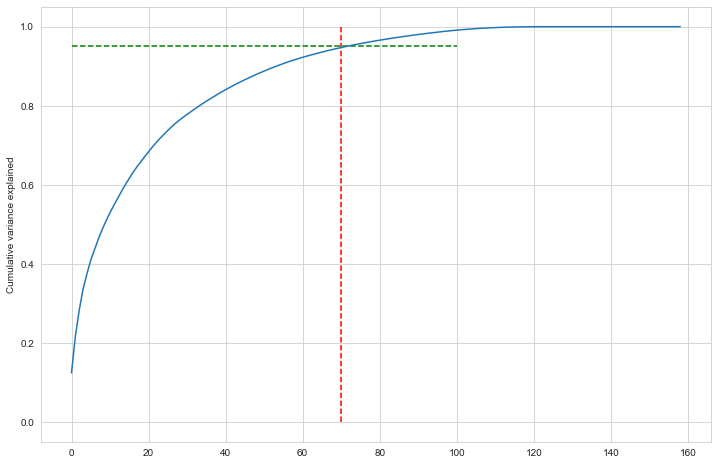

In [87]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

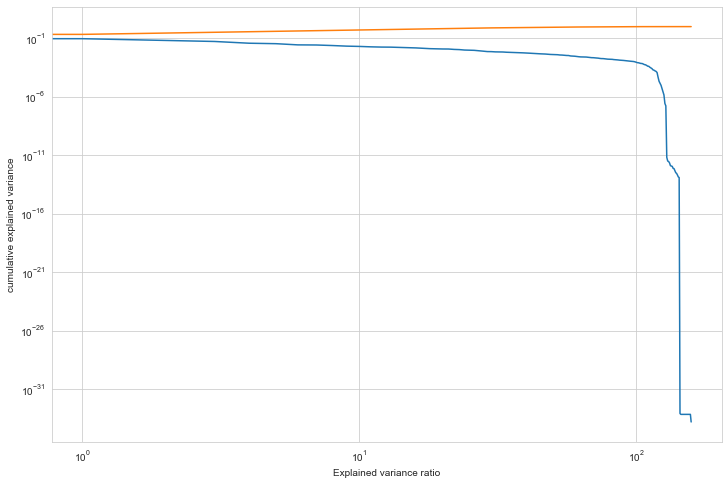

In [88]:
#Making the screeplot - plotting the cumulative variance against the explained variance ration
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.yscale('log')
plt.xscale('log')
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Explained variance ratio')
plt.ylabel('cumulative explained variance')
plt.show()

### PCA and Logistic Regression

In [89]:
# create pipeline
no_of_var = 75
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components = no_of_var)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [90]:
# fit the model
pipeline.fit(X_train, y_train)

# Check the score on the training data
pipeline.score(X_train, y_train)

0.8198095238095238

#### Make prediction on the Test data

In [91]:
# Predict on test data
y_pred = pipeline.predict(X_test)

In [92]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6888 1336]
 [ 187  590]]


In [93]:
# Check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("Accuracy =>", roc_auc_score(y_test, y_pred_prob))
print("Sensitivity =>", cm[0,0]/(cm[0,0]+cm[0,1]))
print("Specificity =>", cm[1,1]/(cm[1,0]+cm[1,1]))


Accuracy => 0.8436667455393136
Sensitivity => 0.8375486381322957
Specificity => 0.7593307593307593


### Hyperparameter tuning(with class_weight)

In [94]:
# Let's check the class imbalance
y_train.value_counts()/len(y_train.index)

0   0.9161
1   0.0839
Name: churn, dtype: float64

In [95]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [55, 75], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [96]:
# fit the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           c...
                          

In [97]:
# cross validation results
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          2.3266        0.1253           0.0000          0.0000   
1          2.6028        0.1737           0.0000          0.0000   
2          3.0327        0.1369           0.0694          0.0177   
3          3.8826        0.1752           0.0694          0.0066   
4          2.5217        0.3483           0.0000          0.0000   
5          3.0514        0.2386           0.0000          0.0000   
6          3.1759        0.1898           0.0778          0.0173   
7          3.8457        0.2543           0.0770          0.0226   
8          2.2426        0.1461           0.0000          0.0000   
9          2.8526        0.1467           0.0000          0.0000   
10         3.0774        0.1416           0.0624          0.0083   
11         4.0355        0.1408           0.0806          0.0133   
12         2.4856        0.1216           0.0000          0.0000   
13         2.8727        0.1787           0.0000          0.0000   
14         3.0137        0.1590           0.0866          0.0195   
15         4.0075        0.5266           0.0740          0.0147   
16         2.3338        0.0962           0.0000          0.0000   
17         2.8699        0.1443           0.0000          0.0000   
18         3.2621        0.2844           0.0814          0.0120   
19         4.3625        0.4528           0.0922          0.0158   
20         2.1941        0.2519           0.0000          0.0000   
21         3.0341        0.2616           0.0000          0.0000   
22         3.1749        0.2303           0.0882          0.0160   
23         4.3833        0.3787           0.0824          0.0222   
24         2.4293        0.1750           0.0000          0.0000   
25         2.8833        0.1161           0.0000          0.0000   
26         3.2072        0.1914           0.0614          0.0092   
27         4.2694        0.2548           0.0800          0.0171   
28         2.1443        0.1752           0.0000          0.0000   
29         2.9242        0.2435           0.0000          0.0000   
30         3.1520        0.1116           0.0816          0.0082   
31         3.0622        0.5491           0.0313          0.0131   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0             0.1000                      l1                      55   
1             0.1000                      l1                      75   
2             0.1000                      l2                      55   
3             0.1000                      l2                      75   
4             0.5000                      l1                      55   
5             0.5000                      l1                      75   
6             0.5000                      l2                      55   
7             0.5000                      l2                      75   
8                  1                      l1                      55   
9                  1                      l1                      75   
10                 1                      l2                      55   
11                 1                      l2                      75   
12                 2                      l1                      55   
13                 2                      l1                      75   
14                 2                      l2                      55   
15                 2                      l2                      75   
16                 3                      l1                      55   
17                 3                      l1                      75   
18                 3                      l2                      55   
19                 3                      l2                      75   
20                 4                      l1                      55   
21                 4                      l1                      75   
22                 4                      l2                      55   
23                 4           

In [98]:
# Best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8909473368924999
Best hyperparameters:  {'logistic__C': 3, 'logistic__penalty': 'l2', 'pca__n_components': 75}


In [99]:
# predict churn on test data
y_pred = model.predict(X_test)

In [100]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6979 1245]
 [ 188  589]]


In [102]:
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy    =>", roc_auc_score(y_test, y_pred_prob))
print("Sensitivity =>", cm[0,0]/(cm[0,0]+cm[0,1]))
print("Specificity =>", cm[1,1]/(cm[1,0]+cm[1,1]))


Accuracy    => 0.8481884643120052
Sensitivity => 0.848613813229572
Specificity => 0.758043758043758


### Method #1 Observations
- Getting Accuracy of 84.69%
- Getting Sensitivity of 84.48%
- It is evident from the confusion Matrix that the model has high false positives
- Data is higly imbalanced only 8.5% data is churn & remaining is non_churn
- 90% variance is explained by 54 Variables
- Approximately 95% variance is explained by 72 Variables

### Method #2 Model Building and Evaluation using PCA and XGBoosting
Some important hyperparameters being used are ```subsample```, ```learning_rate```, ```max_depth``` etc.

We have got already the X and y variables, created during the PCA model building activies, let's reuse the same datasets for XGBoosting

#### Split the data into train and test

In [103]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### PCA with 75 Columns, as derived in the Model #1

In [104]:
# PCA with 75 Columns, this time we will use incremental PCA
from sklearn.decomposition import IncrementalPCA

pca_2 = IncrementalPCA(n_components = 75)

In [105]:
## Fit and Transform the training dataset
X_train_pca = pca_2.fit_transform(X_train)

In [106]:
## Check the shape
X_train_pca.shape

(21000, 75)

In [107]:
# Create a correlation matrix
corrmat = np.corrcoef(X_train_pca.transpose())

In [108]:
corrmat.shape

(75, 75)

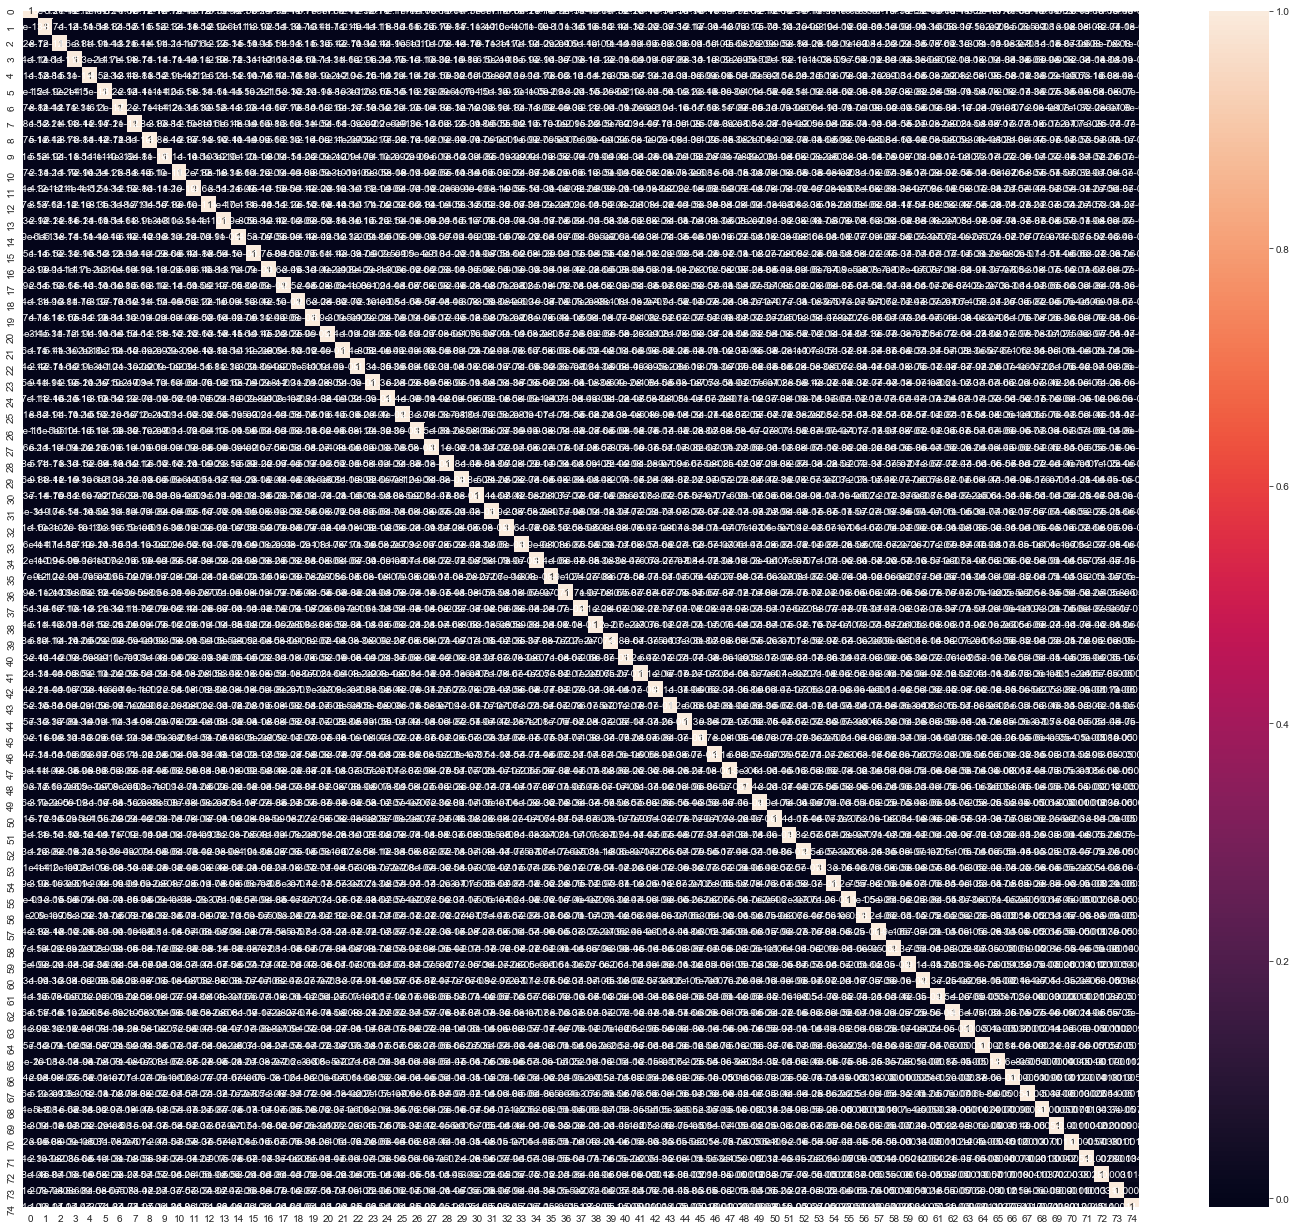

In [109]:
# Plot the heatmap to check the correlation
plt.figure(figsize = (25,22))
sns.heatmap(corrmat, annot = True)
plt.show()

#### Apply the transformation on the test dataset

In [110]:
# Only transformation is required
X_test_pca = pca_2.transform(X_test)

In [111]:
# Verify the shape
X_test_pca.shape

(9001, 75)

#### Fit the model on training data with defaulat hyperparameters

In [112]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### Make prediction on the test data

In [113]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test_pca)
y_pred[:10]

array([[0.91662675, 0.08337327],
       [0.91628593, 0.08371408],
       [0.9810918 , 0.01890822],
       [0.97461915, 0.02538085],
       [0.8766856 , 0.1233144 ],
       [0.9862117 , 0.01378828],
       [0.97784716, 0.02215283],
       [0.9884694 , 0.0115306 ],
       [0.97804934, 0.02195064],
       [0.970783  , 0.02921699]], dtype=float32)

In [114]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 90.53%


The roc_auc in this case is about **90.53%** with default hyperparameters. Let's try changing the hyperparameters.

Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [115]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9, 0.12]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [116]:
# fit the model
model_cv.fit(X_train_pca, y_train) 

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9, 0.12]},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [117]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         5.1250        0.0884           0.0379          0.0022   
1         7.1396        0.1555           0.0393          0.0019   
2         8.1964        0.3083           0.0439          0.0022   
3         3.4814        0.2769           0.0389          0.0029   
4         5.1965        0.2912           0.0412          0.0047   
5         6.8819        0.0607           0.0366          0.0005   
6         7.7991        0.3046           0.0412          0.0017   
7         3.0495        0.0247           0.0392          0.0019   

  param_learning_rate param_subsample  \
0              0.2000          0.3000   
1              0.2000          0.6000   
2              0.2000          0.9000   
3              0.2000          0.1200   
4              0.6000          0.3000   
5              0.6000          0.6000   
6              0.6000          0.9000   
7              0.6000          0.1200   

                                      params  split0_test_score  \
0   {'learning_rate': 0.2, 'subsample': 0.3}             0.8939   
1   {'learning_rate': 0.2, 'subsample': 0.6}             0.8961   
2   {'learning_rate': 0.2, 'subsample': 0.9}             0.9008   
3  {'learning_rate': 0.2, 'subsample': 0.12}             0.8735   
4   {'learning_rate': 0.6, 'subsample': 0.3}             0.8408   
5   {'learning_rate': 0.6, 'subsample': 0.6}             0.8681   
6   {'learning_rate': 0.6, 'subsample': 0.9}             0.8778   
7  {'learning_rate': 0.6, 'subsample': 0.12}             0.8097   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0             0.8918             0.9006           0.8954          0.0037   
1             0.8957             0.9101           0.9006          0.0067   
2             0.8939             0.9103           0.9016          0.0067   
3             0.8659             0.8857           0.8750          0.0082   
4             0.8306             0.8514           0.8409          0.0085   
5             0.8746             0.8828           0.8751          0.0060   
6             0.8797             0.8932           0.8835          0.0068   
7             0.8070             0.8051           0.8073          0.0019   

   rank_test_score  split0_train_score  split1_train_score  \
0                3              0.9498              0.9501   
1                2              0.9564              0.9568   
2                1              0.9575              0.9578   
3                6              0.9288              0.9340   
4                7              0.9575              0.9557   
5                5              0.9827              0.9810   
6                4              0.9870              0.9866   
7                8              0.8906              0.8889   

   split2_train_score  mean_train_score  std_train_score  
0              0.9472            0.9490           0.0013  
1              0.9526            0.9553           0.0019  
2              0.9540            0.9564           0.0017  
3              0.9277            0.9302           0.0028  
4              0.9497            0.9543           0.0034  
5              0.9805            0.9814           0.0009  
6              0.9861            0.9866           0.0004  
7              0.8776            0.8857           0.0058

In [118]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         5.1250        0.0884           0.0379          0.0022   
1         7.1396        0.1555           0.0393          0.0019   
2         8.1964        0.3083           0.0439          0.0022   
3         3.4814        0.2769           0.0389          0.0029   
4         5.1965        0.2912           0.0412          0.0047   

   param_learning_rate param_subsample  \
0               0.2000          0.3000   
1               0.2000          0.6000   
2               0.2000          0.9000   
3               0.2000          0.1200   
4               0.6000          0.3000   

                                      params  split0_test_score  \
0   {'learning_rate': 0.2, 'subsample': 0.3}             0.8939   
1   {'learning_rate': 0.2, 'subsample': 0.6}             0.8961   
2   {'learning_rate': 0.2, 'subsample': 0.9}             0.9008   
3  {'learning_rate': 0.2, 'subsample': 0.12}             0.8735   
4   {'learning_rate': 0.6, 'subsample': 0.3}             0.8408   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0             0.8918             0.9006           0.8954          0.0037   
1             0.8957             0.9101           0.9006          0.0067   
2             0.8939             0.9103           0.9016          0.0067   
3             0.8659             0.8857           0.8750          0.0082   
4             0.8306             0.8514           0.8409          0.0085   

   rank_test_score  split0_train_score  split1_train_score  \
0                3              0.9498              0.9501   
1                2              0.9564              0.9568   
2                1              0.9575              0.9578   
3                6              0.9288              0.9340   
4                7              0.9575              0.9557   

   split2_train_score  mean_train_score  std_train_score  
0              0.9472            0.9490           0.0013  
1              0.9526            0.9553           0.0019  
2              0.9540            0.9564           0.0017  
3              0.9277            0.9302           0.0028  
4              0.9497            0.9543           0.0034

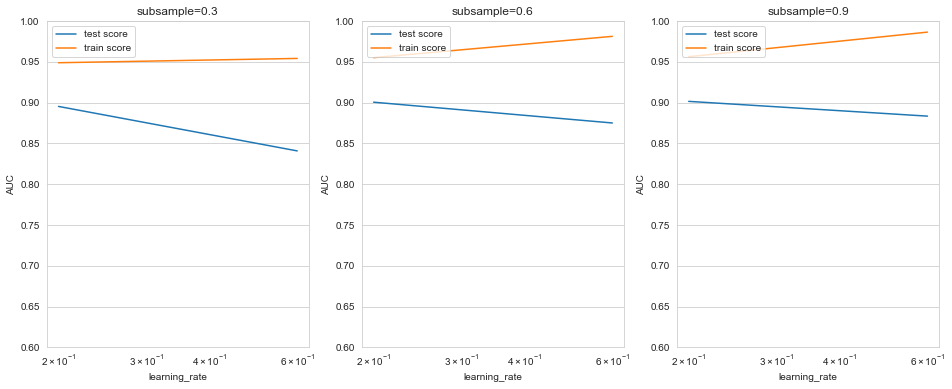

In [119]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.9 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 

Let's build a final model with the chosen hyperparameters.

In [120]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [121]:
# predict
y_pred = model.predict_proba(X_test_pca)
y_pred[:10]

array([[0.91662675, 0.08337327],
       [0.91628593, 0.08371408],
       [0.9810918 , 0.01890822],
       [0.97461915, 0.02538085],
       [0.8766856 , 0.1233144 ],
       [0.9862117 , 0.01378828],
       [0.97784716, 0.02215283],
       [0.9884694 , 0.0115306 ],
       [0.97804934, 0.02195064],
       [0.970783  , 0.02921699]], dtype=float32)

The first column in y_pred is the P(0), i.e. P(not churn), and the second column is P1(churn).

In [122]:
# roc_auc
auc = sklearn.metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.9052678477532563

#### Accuracy is 90.52%

### Method #3 Model Building and Evaluation using RFE

We have got already the X and y variables, created during the PCA model building activies, let's reuse the same datasets for RFE

#### Split the data into train and test

In [123]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Standardize The Features

In [124]:
# Create an instance of StandardScaler Class
scaler = StandardScaler()

# Fit and Transform the training dataset
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Check the class imbalance

In [125]:
# Let's check the class imbalance
y_train.value_counts()/len(y_train.index)

0   0.9161
1   0.0839
Name: churn, dtype: float64

#### Let's balance the dataset by oversampling

In [126]:
# Balance the Dataset
smt = SMOTE(random_state = 2)
X_train_res,y_train_res = smt.fit_sample(X_train,y_train)

In [127]:
print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of X_train: (38476, 159)
After OverSampling, the shape of y_train: (38476,) 

After OverSampling, counts of label '1': 19238
After OverSampling, counts of label '0': 19238


#### Feature Selection Using RFE

In [128]:
# Feature selection using RFE
logreg = LogisticRegression()

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)   
rfe = rfe.fit(X_train_res, y_train_res)

In [129]:
## Print RFE Features and their rnaking
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 128),
 ('arpu_7', False, 47),
 ('arpu_8', False, 50),
 ('onnet_mou_6', False, 9),
 ('onnet_mou_7', False, 28),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 11),
 ('offnet_mou_7', False, 91),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 131),
 ('roam_ic_mou_7', False, 90),
 ('roam_ic_mou_8', False, 139),
 ('roam_og_mou_6', False, 12),
 ('roam_og_mou_7', False, 27),
 ('roam_og_mou_8', False, 26),
 ('loc_og_t2t_mou_6', False, 80),
 ('loc_og_t2t_mou_7', False, 89),
 ('loc_og_t2t_mou_8', False, 31),
 ('loc_og_t2m_mou_6', False, 70),
 ('loc_og_t2m_mou_7', False, 76),
 ('loc_og_t2m_mou_8', False, 32),
 ('loc_og_t2f_mou_6', False, 81),
 ('loc_og_t2f_mou_7', False, 109),
 ('loc_og_t2f_mou_8', False, 132),
 ('loc_og_t2c_mou_6', False, 77),
 ('loc_og_t2c_mou_7', False, 86),
 ('loc_og_t2c_mou_8', False, 88),
 ('loc_og_mou_6', False, 79),
 ('loc_og_mou_7', False, 34),
 ('loc_og_mou_8', False, 6),
 ('std_og_t2t_mou_6', False, 104),
 ('std_og_t2t_mou_7', False, 54),

In [130]:
# Get the top 20 columns in a list cols
cols = X.columns[rfe.support_]

In [131]:
# print the relevant columns
print(cols)

Index(['onnet_mou_8', 'offnet_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_6', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_8',
       'total_rech_amt_8', 'sep_vbc_3g', 'last_rech_day_data_8',
       'arpu_3_mths_avg'],
      dtype='object')


In [132]:
# print columns, that are left out
print(X.columns[~rfe.support_])

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8',
       ...
       'avg_rech_first_2_months_data', 'avg_rech_first_2_months_amt',
       'last_rech_day_6', 'last_rech_day_7', 'last_rech_day_8',
       'last_rech_day_data_6', 'last_rech_day_data_7', 'arpu_2_mths_avg',
       'avg_tot_rech_2_mths_avg', 'avg_tot_rech_3_mths_avg'],
      dtype='object', length=139)


In [133]:
# Convert the resampled data into a dataframe
X_rfe = pd.DataFrame(X_train_res, columns=X.columns)

# Use only the relevant columns
X_rfe = X_rfe[cols]

y_rfe = y_train_res

In [134]:
# Reverify
X_rfe.shape

(38476, 20)

#### Build and Evaluate the model

In [135]:
# Create an instance of the LogisticRegression Class
logm1 = LogisticRegression(random_state=1)

# Fit the model
logm1 = logm1.fit(X_rfe, y_rfe)

#### Check the VIF

In [136]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
12        total_ic_mou_6 270.6100
6           loc_ic_mou_6 207.4600
8           loc_ic_mou_8 127.6200
13        total_ic_mou_8 115.4700
10          std_ic_mou_6  38.9300
5       loc_ic_t2m_mou_8  36.7800
3         total_og_mou_8  32.7400
11          std_ic_mou_8  19.5800
4       loc_ic_t2t_mou_8  17.3300
1           offnet_mou_8  13.6000
0            onnet_mou_8  12.2600
14          isd_ic_mou_6  10.1600
2           std_og_mou_8   5.6400
16      total_rech_amt_8   5.1400
15          isd_ic_mou_8   4.4700
7           loc_ic_mou_7   4.4300
9       std_ic_t2m_mou_8   3.9300
19       arpu_3_mths_avg   3.8300
18  last_rech_day_data_8   1.3000
17            sep_vbc_3g   1.0400

There are a few variables with very high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable `total_ic_mou_6` has the highest VIF. So let's start by dropping that.

In [137]:
X_rfe = X_rfe.drop('total_ic_mou_6', 1)

In [138]:
# Create an instance of the LogisticRegression Class
logm2 = LogisticRegression(random_state=1)

# Fit the model
logm2 = logm2.fit(X_rfe, y_rfe)

#### Check the VIF

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
8           loc_ic_mou_8 112.9200
12        total_ic_mou_8  91.9800
5       loc_ic_t2m_mou_8  36.7800
3         total_og_mou_8  32.7300
4       loc_ic_t2t_mou_8  17.3200
11          std_ic_mou_8  16.5000
1           offnet_mou_8  13.5900
0            onnet_mou_8  12.2500
2           std_og_mou_8   5.6400
15      total_rech_amt_8   5.0800
7           loc_ic_mou_7   4.4200
9       std_ic_t2m_mou_8   3.9300
14          isd_ic_mou_8   3.8400
18       arpu_3_mths_avg   3.8100
6           loc_ic_mou_6   2.7800
10          std_ic_mou_6   1.6400
13          isd_ic_mou_6   1.2800
17  last_rech_day_data_8   1.2800
16            sep_vbc_3g   1.0400

There are a few variables with very high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable `loc_ic_mou_8` has the highest VIF. So let's start by dropping that.

In [140]:
X_rfe = X_rfe.drop('loc_ic_mou_8', 1)

In [141]:
# Create an instance of the LogisticRegression Class
logm3 = LogisticRegression(random_state=1)

# Fit the model
logm3 = logm3.fit(X_rfe, y_rfe)

#### Check the VIF

In [142]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
11        total_ic_mou_8 55.8400
3         total_og_mou_8 31.6900
5       loc_ic_t2m_mou_8 20.2700
1           offnet_mou_8 13.2300
10          std_ic_mou_8 12.1000
0            onnet_mou_8 11.9600
4       loc_ic_t2t_mou_8  9.8700
2           std_og_mou_8  5.6400
14      total_rech_amt_8  5.0700
7           loc_ic_mou_7  4.4200
8       std_ic_t2m_mou_8  3.9300
17       arpu_3_mths_avg  3.8100
13          isd_ic_mou_8  2.8300
6           loc_ic_mou_6  2.7600
9           std_ic_mou_6  1.6400
12          isd_ic_mou_6  1.2800
16  last_rech_day_data_8  1.2700
15            sep_vbc_3g  1.0400

Feature `total_ic_mou_8` has a high VIF of 55, let's drop it

In [143]:
X_rfe = X_rfe.drop('total_ic_mou_8', 1)
# Create an instance of the LogisticRegression Class
logm4 = LogisticRegression(random_state=1)

# Fit the model
logm4 = logm4.fit(X_rfe, y_rfe)

#### Check the VIF

In [144]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
3         total_og_mou_8 29.8100
1           offnet_mou_8 12.7500
0            onnet_mou_8 11.5300
2           std_og_mou_8  5.5900
13      total_rech_amt_8  4.9800
10          std_ic_mou_8  4.7800
7           loc_ic_mou_7  4.3000
8       std_ic_t2m_mou_8  3.9300
16       arpu_3_mths_avg  3.8000
6           loc_ic_mou_6  2.7500
5       loc_ic_t2m_mou_8  2.4100
9           std_ic_mou_6  1.6400
4       loc_ic_t2t_mou_8  1.6000
12          isd_ic_mou_8  1.3000
11          isd_ic_mou_6  1.2800
15  last_rech_day_data_8  1.2500
14            sep_vbc_3g  1.0400

Feature `total_og_mou_8` has a high VIF of 29, let's drop it

In [145]:
X_rfe = X_rfe.drop('total_og_mou_8', 1)

In [146]:
# Create an instance of the LogisticRegression Class
logm5 = LogisticRegression(random_state=1)

# Fit the model
logm5 = logm5.fit(X_rfe, y_rfe)

In [147]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12      total_rech_amt_8 4.9800
2           std_og_mou_8 4.9100
9           std_ic_mou_8 4.7800
6           loc_ic_mou_7 4.2900
7       std_ic_t2m_mou_8 3.9300
15       arpu_3_mths_avg 3.7900
1           offnet_mou_8 3.6300
0            onnet_mou_8 3.1300
5           loc_ic_mou_6 2.7500
4       loc_ic_t2m_mou_8 2.3300
8           std_ic_mou_6 1.6400
3       loc_ic_t2t_mou_8 1.5800
11          isd_ic_mou_8 1.3000
10          isd_ic_mou_6 1.2800
14  last_rech_day_data_8 1.2300
13            sep_vbc_3g 1.0400

All the features have VIF less than **5**. Hence, we can use model logm5 for prediction

#### Make predictions on the Test Data

In [148]:
## Get the relevant RFE Test Freatures
X_test_rfe = pd.DataFrame(X_test, columns = X.columns)
X_test_rfe = X_test_rfe[X_rfe.columns]

## Make predictions on test data
y_pred = logm5.predict(X_test_rfe)


## Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6343 1881]
 [ 144  633]]


In [149]:
# check area under curve
y_pred_prob = logm5.predict_proba(X_test_rfe)[:, 1]

print("Accuracy    =>", roc_auc_score(y_test, y_pred_prob))
print("Sensitivity =>", cm[0,0]/(cm[0,0]+cm[0,1]))
print("Specificity =>", cm[1,1]/(cm[1,0]+cm[1,1]))

Accuracy    => 0.8703865761258758
Sensitivity => 0.7712791828793775
Specificity => 0.8146718146718147


### Method #3 Observations
- Getting Accuracy of **87.03%**
- Sensitivity of **81.46%**
- It is evident from the confusion Matrix that the model has relatively high false positives
-  Top Features obtained from RFE are:
 - `total_rech_amt_8`
 - `std_og_mou_8`
 - `std_ic_mou_8`
 - `loc_ic_mou_7`
 - `std_ic_t2m_mou_8`
 - `arpu_3_mths_avg`
 - `offnet_mou_8`
 - `onnet_mou_8`
 - `loc_ic_mou_6`
 - `loc_ic_t2m_mou_8`
 - `std_ic_mou_6`
 - `loc_ic_t2t_mou_8`
 - `isd_ic_mou_8`
 - `isd_ic_mou_6`
 - `last_rech_day_data_8`
 - `sep_vbc_3g`

### Method #4 Model Building and Evaluation using Random Forest

We have got already the X and y variables, created during the PCA model building activies, let's reuse the same datasets for Random Forest 

#### Split the data into train and test

In [150]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [151]:
X_train.shape

(21000, 159)

#### Default Hyperparameters

Let's first fit a random forest model with default hyperparameters.

In [152]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [153]:
# fit the training dataset
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Make prediction on the test dataset

In [154]:
# Making predictions
predictions = rfc.predict(X_test)

In [155]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8224
           1       0.77      0.49      0.60       777

    accuracy                           0.94      9001
   macro avg       0.86      0.74      0.79      9001
weighted avg       0.94      0.94      0.94      9001



In [156]:
# Prin confusion matrix
print(confusion_matrix(y_test,predictions))

[[8112  112]
 [ 394  383]]


In [157]:
print('Accuracy => ', accuracy_score(y_test,predictions))

Accuracy =>  0.9437840239973336


In [158]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [159]:
# fit the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                   

In [160]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best Parameters: ", model.best_params_)

Best AUC:  0.9435460793998821
Best Parameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [161]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8105  119]
 [ 388  389]]


In [162]:
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy    =>", roc_auc_score(y_test, y_pred_prob))
print("Sensitivity =>", cm[0,0]/(cm[0,0]+cm[0,1]))
print("Specificity =>", cm[1,1]/(cm[1,0]+cm[1,1]))

Accuracy    => 0.9487060973563892
Sensitivity => 0.9855301556420234
Specificity => 0.5006435006435006


#### Selecting Best Features

In [163]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)


13


In [164]:
# fit the model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.6s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features=13, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [165]:
# OOB score
rf_model.oob_score_

0.9416666666666667

In [166]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[[8125   99]
 [ 432  345]]


In [167]:
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy    =>", roc_auc_score(y_test, y_pred_prob))
print("Sensitivity =>", cm[0,0]/(cm[0,0]+cm[0,1]))
print("Specificity =>", cm[1,1]/(cm[1,0]+cm[1,1]))

Accuracy    => 0.9487060973563892
Sensitivity => 0.9879620622568094
Specificity => 0.444015444015444


#### Feature Importance

In [168]:

# predictors
features = X.columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 99.99999999999997


variables  importance_percentage
0                  total_og_mou_8                 4.8652
1                  total_ic_mou_8                 4.5450
2                          arpu_8                 4.3131
3                total_rech_amt_8                 3.8437
4                    loc_ic_mou_8                 3.4347
5                loc_ic_t2m_mou_8                 3.1475
6              last_day_rch_amt_8                 3.0844
7                 last_rech_day_8                 2.8010
8                loc_og_t2m_mou_8                 2.4957
9                    loc_og_mou_8                 2.4293
10                  roam_og_mou_8                 2.3734
11                  roam_ic_mou_8                 1.8862
12                    vol_2g_mb_8                 1.8038
13                 max_rech_amt_8                 1.7342
14               loc_ic_t2t_mou_8                 1.5999
15               loc_og_t2t_mou_8                 1.4867
16               loc_ic_t2f_mou_8                 1.4281
17           last_rech_day_data_8                 1.3491
18               total_rech_num_8                 1.2235
19             av_rech_amt_data_8                 1.2042
20                max_rech_data_8                 1.1318
21                      fb_user_8                 0.9679
22                 total_ic_mou_7                 0.9276
23                    onnet_mou_8                 0.9047
24                   offnet_mou_8                 0.8984
25                   std_ic_mou_8                 0.8641
26               loc_og_t2f_mou_8                 0.8344
27                 total_ic_mou_6                 0.7751
28                   spl_og_mou_8                 0.7537
29                   std_og_mou_8                 0.7358
30              total_rech_data_8                 0.7315
31                         arpu_7                 0.7157
32                   loc_ic_mou_7                 0.6780
33               loc_ic_t2m_mou_7                 0.6613
34               std_ic_t2m_mou_8                 0.6566
35                 total_og_mou_7                 0.6254
36               total_rech_amt_7                 0.6207
37               total_rech_num_7                 0.6144
38                   std_og_mou_7                 0.6004
39               loc_og_t2m_mou_7                 0.5721
40                arpu_2_mths_avg                 0.5675
41                   offnet_mou_7                 0.5603
42                 total_og_mou_6                 0.5550
43    avg_rech_first_2_months_amt                 0.5544
44               loc_ic_t2t_mou_7                 0.5465
45               loc_ic_t2f_mou_7                 0.5421
46                   offnet_mou_6                 0.5412
47               std_og_t2m_mou_8                 0.5344
48                    onnet_mou_6                 0.5275
49        avg_rech_first_2_months                 0.5262
50                         arpu_6                 0.5222
51        avg_tot_rech_2_mths_avg                 0.5198
52               loc_ic_t2m_mou_6                 0.5135
53                arpu_3_mths_avg                 0.5020
54               std_ic_t2t_mou_8                 0.4980
55                   loc_ic_mou_6                 0.4956
56                    onnet_mou_7                 0.4941
57               total_rech_num_6                 0.4923
58               std_og_t2m_mou_7                 0.4906
59                     aug_vbc_3g                 0.4862
60                  roam_og_mou_7                 0.4849
61               loc_og_t2m_mou_6                 0.4791
62               loc_ic_t2t_mou_6                 0.4774
63               std_og_t2t_mou_8                 0.4694
64                   std_og_mou_6                 0.4664
65        avg_tot_rech_3_mths_avg                 0.4588
66               std_ic_t2f_mou_8                 0.4550
67                   loc_og_mou_6                 0.4398
68               total_rech_amt_6                 0.4386
69                   std_ic_mou_7 

#### Selecting Top 30 Features

In [169]:
top_features = feature_importance.variables[0:30]

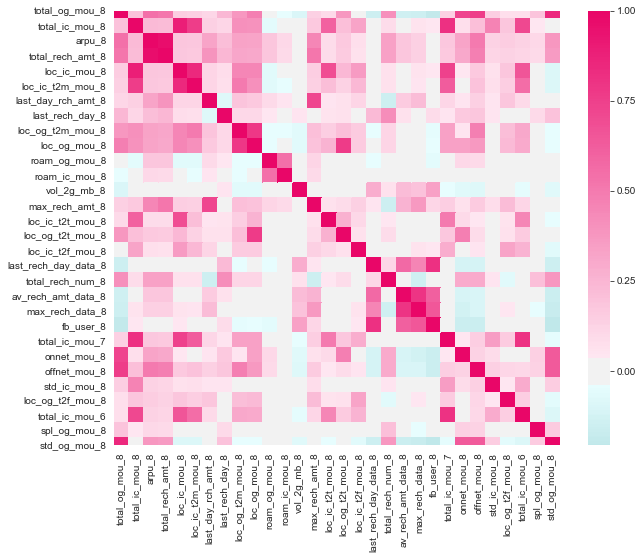

In [170]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,8)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [171]:
top_features = ['total_ic_mou_8', 'total_og_mou_8','total_rech_amt_8', 'last_day_rch_amt_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'max_rech_amt_8', 'std_og_mou_8']

In [172]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [173]:
X_train = X_train[top_features]
X_test =  X_test[top_features]

#### Logistic Regression with Top features only

In [174]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.2, 1:0.8}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [175]:
X_train.shape

(21000, 10)

In [176]:
# fit the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.2,
                                                                         1: 0.8},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
      

In [177]:
# print the best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.856548037481593
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [178]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7572  652]
 [ 256  521]]


In [179]:
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy    =>", roc_auc_score(y_test, y_pred_prob))
print("Sensitivity =>", cm[0,0]/(cm[0,0]+cm[0,1]))
print("Specificity =>", cm[1,1]/(cm[1,0]+cm[1,1]))

Accuracy    => 0.8671589008408075
Sensitivity => 0.9207198443579766
Specificity => 0.6705276705276705


#### Intercept and the coefficients from the logistic model

In [180]:
logreg_model = model.best_estimator_.named_steps['logistic']

In [181]:
# intercept
intercept_df = pd.DataFrame(logreg_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [182]:
# coefficients
coefficients = logreg_model.coef_.reshape((10, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logreg_model.coef_, columns=logistic_features)

In [183]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

intercept  total_ic_mou_8  total_og_mou_8  total_rech_amt_8  \
0    -2.3834         -2.0774         -1.1676           -1.1443   

   last_day_rch_amt_8  arpu_8  roam_ic_mou_8  roam_og_mou_8  std_ic_mou_8  \
0             -0.2703 -0.0857         0.0885         0.3231        0.6213   

   max_rech_amt_8  std_og_mou_8  
0          0.1987        1.1288

### Conclusion/Results

#### 1. PCA and Logistic Regrsession

- Confusion Matrix => [[6921, 1303][186, 591]]
- Accuracy    => 0.8464168813755388
- Sensitivity => 0.8415612840466926
- Specificity => 0.7606177606177607



#### 2. PCA and XGBoost
- Accuracy    => 0.9052678477532563

#### 3. Logistic Regression Using RFE

- Confusion Matrix => [[6343, 1881][144, 633]]
- Accuracy         => 0.8703865761258758
- Sensitivity      => 0.7712791828793775
- Specificity      => 0.8146718146718147

#### 4. Random Forest

- Confusion Matrix => [[8125, 99][432, 345]]
- Accuracy    => 0.9456063553826201
- Sensitivity => 0.9879620622568094
- Specificity => 0.444015444015444

### Best Model

With accuracy of **94%**, sensitivity of **98%** and very low false positives, the best model found out to be is ***RANDOM FOREST***


### Best Features and thier coefficients

### Recommendations

As per the analysis:

- Telecom company should offer better(discounted) STD charges or packs to the customers, especially to those who are about to Churn.
- Telecom company should also need to revisit their roaming charges for both incoming and outgoing calls. Perhaps, the existing rates are not good enough for the customers, who often use the service out of the local region.
- Also, to reduce churn rate or to retain customers, company should start looking at their recharge amount. Perhaps, they should start making calls to the high risk customer and offer some retention discounts.